## Исследование данных о российском кинопрокате



Описание проекта.

Заказчиком исследования является Министерство культуры Российской Федерации. Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Более детально разобрать фильмы, которые получили государственную поддержку. В конце исследования попробуйю ответить на вопрос, насколько такие фильмы интересны зрителю. 

Работать буду с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

План исследования.

Шаг 1. Открыть файлы с данными и объединить их в один датафрейм

* Объединить данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм. 
* Пути к файлам: 

/datasets/mkrf_movies.csv — данные о прокатных удостоверениях.

/datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах. 

Шаг 2. Предобработка данных

* Проверить типы данных в датафрейме и преобразовать там, где это необходимо.
* Изучите пропуски в датафрейме. Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать.
* Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.
* Изучить столбцы, которые содержат категориальные значения:
* Посмотреть, какая общая проблема встречается почти во всех категориальных столбцах;
* Исправить проблемные значения в поле type.
* Изучить столбцы, которые хранят количественные значения. Проверить, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?
* Добавить новые столбцы:
* Создать столбец с информацией о годе проката. Выделить год из даты премьеры фильма;
* Создайть два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
* Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.

Шаг 3. Провести исследовательский анализ данных
* Посмотреть, сколько фильмов выходило в прокат каждый год. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделать вывод о том, какой период полнее всего представлен в данных.
* Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
* С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделать выводы.
* Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.

Шаг 4. Исследовать фильмы, которые получили государственную поддержку
* Создать новую переменную с фильмами, которые получили государственную поддержку.
* Проанализировать фильмы с государственной поддержкой:
    * Среднее и медианное значения бюджета
    * Среднее и медианное значения рейтинга
    * Какие фильмы чаще всего снимают с господдержкой?
    * Провести анализ как финансируют фильмы с господдержкой.
    * Где снимают чаще всего фильмы с господдержкой?
    * Рассчитать и проанализирвоать окупаемость

Шаг 5. Написать общий вывод

Описание данных
    
* Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
# 1. Загружаем данные из csv-файла в датафрейм c помощью библиотеки pandas
import pandas as pd

In [2]:
# Импортируем библиотеку matplotlib для работы с графиками
import matplotlib.pyplot as plt

In [3]:
# Сразу преобразуем экспоненциальный формат представления чисел и избавимся от лишних знаков после запятых.
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
# Прочитаем первый файл
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
# Прочитаем второй файл
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [6]:
# 2. Изучим типы данных и общую информацию о полученных датафреймах
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Из полученных данных видим, что для объединения двух тоблиц по столбцу "puNumber", необходимо изменить в таблице mkrf_movies данные столбца с object на int64 (так как номер прокатного удостоверения это целое число)

In [8]:
# Изменим тип данных
# mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

Изменить тип данных не получилось скорее всего из-за не числовых данных в столбце.

In [9]:
# Напишем функцию, которая найдет не числовые данные в столбце puNumber
mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Обработаем строку 804 функцией strip(), которая используется для возврата копии исходной строки путем удаления начальных и конечных пробелов и символов.

In [10]:
# Воспользуемся атрибутом loc и функцией strip()
mkrf_movies.loc[804, 'puNumber'] = mkrf_movies.loc[804, 'puNumber'].strip()

В строке 1797 вместо номера прокатного удостоверения, написана запись "нет". Причина отсутствия прокатного удостоверения у данного фильма не известна. Поискав на портале открытых данных Министерства культуры данный фильм, находим его прокатное удостоверение. Ссылка: https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2166787

In [11]:
# Воспользуемся атрибутом loc и присвоим фильму верный номер прокатного удостоверения
mkrf_movies.loc[1797, 'puNumber'] = '111009614'

In [12]:
# Попробуем повторно изменить тип данных
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

In [13]:
# Проверим полученные данные
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [14]:
# Объединим таблицы, используя метод merge и создав новый датафрейм data
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [15]:
# Проверим полученные данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
# Приведем название столбца puNumber к правилу красивого кода:
data.rename(columns = {'puNumber':'pu_number'}, inplace = True )
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [17]:
# Проверим данные на явные дубликаты
data.duplicated().sum()

0

Явных дубликатов в файле нет.

Шаг 1. Вывод.
* Изучил общую информацию по двум датафемам;
* Нашел и исправил некорректные значения и данные в столбце puNumber;
* Объединил датафреймы методом merge и создал новый датафрейм;
* Привел название столбца puNumber к правилу "красивого кода" - pu_number;
* В данных есть очень много пропусков и есть несоответствие содержимого типу данных.
* Сделал проверку на явные дубликаты. Явных дубликатов в файле нет.

Можно приступать к предобработке данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [20]:
# Выведем еще раз общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [21]:
# И первые 5 строк
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Изменим типы данных в столбце show_start_date с object на datetime64 и в столбце ratings с object на float64

In [22]:
# Переведем столбец с датой show_start_date в формат даты
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data['show_start_date'].dtype

datetime64[ns, UTC]

In [24]:
# Проверим уникальные значения
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В данных есть и проценты, и отсутствующие данные. Обычно для рейтингов используют десятибальную систему и как видно из полученных данных, значений больше 10 нет, не считая процентных.

In [25]:
# Изменим тип данных методом replace:
data['ratings'] = data['ratings'].replace('\%', '',  regex = True)

In [26]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4', '3.1', '97',
       '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '83', '64', '91', '94', '62', '79', '90', '19', '88', '1.0',
       '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '98', '8.9', '9.1'],
      dtype=object)

Как видно, проценты ушли, теперь изменим тип данных и приведем значения "бывших" процентов к рейтингу в диапазоне от 0 до 10.

In [27]:
# Изменим тип данных
data['ratings']= data['ratings'].astype('float64')

In [28]:
# Приведем значения "бывших" процентов к рейтингу в диапазоне от 0 до 10
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings']/10

In [29]:
# Итоговая проверка уникальных значений
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [30]:
# Выведем еще раз общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Шаг 2.1. Вывод.

Изменил типы данных в столбцах:
* show_start_date с object на datetime64, так как это в столбце содержатся данные с датой и временем;
* ratings с object на float64, так как рейтинг это числовые данные.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [31]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [32]:
# Найдем и изучим пропущенные значения в столбцах:
# Определяем в каких столбцах есть пропуски
data.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4327
genres                    976
ratings                   967
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
pu_number                   0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

In [33]:
# Проверим пропуски в процентном отношении от общего числа данных
data_pass = data.isna().sum().sort_values(ascending=False)
data_total = 7486
data_percentage_ratio = data_pass / data_total
data_percentage_ratio

refundable_support      0.96
nonrefundable_support   0.96
budget                  0.96
financing_source        0.96
box_office              0.58
genres                  0.13
ratings                 0.13
producer                0.08
film_studio             0.00
director                0.00
production_country      0.00
title                   0.00
pu_number               0.00
show_start_date         0.00
type                    0.00
age_restriction         0.00
dtype: float64

Начнём заполнение пропусков.

In [34]:
# Столбец producer
# Изучим значения столбца
data['producer'].value_counts()

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            17
Джерри Брукхаймер                                11
                                                 ..
А.Дамскер                                         1
В.Тодоровский, А.Златопольский                    1
Эдуард де Весинн                                  1
Р.Дишдишян, ООО "ММЕ", ООО "Беркана"              1
Поппи Бегум, Ник Пойнц                            1
Name: producer, Length: 5349, dtype: int64

In [35]:
# Продолжаем изучать значения столбца
data['producer'].describe()

count          6918
unique         5349
top       П.Смирнов
freq             67
Name: producer, dtype: object

In [36]:
data.loc[data['producer'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


Пропуски в столбце producer состаляют 7,6% от общего числа данных. 
Из полученных пропусков видно, что большая часть фильмов, где отсутствует продюссер выпущены еще в СССР. Тогда вместо продюссера была должность "Директор фильма" (иногда данная должность встречается и в настоящее время).

Всего пропусков по данному столбцу 568 шт. и искать каждого продюссера (директора фильма) по названию фильма на Кинопоиске очень долго. Удалять их считаю нельзя, т.к. в этих строчках содержится важная для анализа информация по другим столбцам. Заменю пропуски на значение "Директор фильма".

In [37]:
# Заполним пропуски в столбце producer
data['producer'] = data['producer'].fillna('Директор фильма')

In [38]:
# Столбец director
# Изучим значения столбца
data['director'].value_counts()

О.Семёнова                                                                                                                                                                  47
Д.Червяцов                                                                                                                                                                  17
Стивен Содерберг                                                                                                                                                            17
Ридли Скотт                                                                                                                                                                 16
Тиль Швайгер                                                                                                                                                                14
                                                                                                                             

In [39]:
# Продолжаем изучать значения столбца
data['director'].describe()

count           7477
unique          4811
top       О.Семёнова
freq              47
Name: director, dtype: object

In [40]:
data.loc[data['director'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,Директор фильма,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,Директор фильма,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,Директор фильма,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,Директор фильма,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Поискал режиссеров портале открытых данных Министерства культуры по их прокатному удостоверению и на Кинопоиске. Данных для заполнения, кроме "Мульта личности" не нашел. 

Мульт личности. Выпуск 5:
* https://www.kinopoisk.ru/series/487219/
* https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2190480

Пропуски режиссера в основном связаны с тем, что это концерты. Удалять их считаю нельзя, т.к. в этих строчках содержится информация по другим столбцам. Заменим пропуски на значение "Без режиссера".

In [41]:
# Заполню сразу все пропущенные данные по фильму "Мульт Личности" из Кинопоиска:
data.loc[4441, 'director'] = 'В. Пичул, Ю.Владовский'
data.loc[4441, 'production_country'] = 'Россия'
data.loc[4441, 'film_studio'] = 'Пространство идей'

In [42]:
# Заполню оставшиеся пропуски в столбце director
data['director'] = data['director'].fillna('Без режиссера')

In [43]:
# Столбец production_country
# Изучим значения столбца
data['production_country'].value_counts()

США                                    2172
Россия                                 1822
СССР                                    347
Франция                                 301
Великобритания                          257
                                       ... 
США-Франция-Ирландия                      1
Франция - Польша - Бельгия                1
Германия - Бельгия - Великобритания       1
КНР, Индия, Гонконг, США                  1
Швеция - Германия - Франция - Дания       1
Name: production_country, Length: 950, dtype: int64

In [44]:
# Продолжаем изучать значения столбца
data['production_country'].describe()

count     7485
unique     950
top        США
freq      2172
Name: production_country, dtype: object

In [45]:
# Найдем строки с пропусками методом isna
data.loc[data['production_country'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"


Проверив фильм на портале открытых данных Министерства культуры по прокатному удостоверению:
* 111001216 - https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2171550

Поставлю страну производства "Россия"

In [46]:
# Пропуску в столбце production_country присвою значение "Россия"
data.loc[3186, 'production_country'] = 'Россия'

In [47]:
# Столбец film_studio
# Изучим значения столбца
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                      341
ООО "Мульт в кино"                                                                                                          57
Анимаккорд Лтд                                                                                                              23
ООО "Мульт в кино"                                                                                                          18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                      16
                                                                                                                          ... 
Уолт Дисней Пикчерз, Лин Пикчерз, Райдбэк, Марк Платт Продакшнз                                                              1
Каттлея, РАЙ Чинема                                                                                            

In [48]:
# Продолжаем изучать значения столбца
data['film_studio'].describe()

count                      7469
unique                     5491
top       Киностудия "Мосфильм"
freq                        341
Name: film_studio, dtype: object

In [49]:
# Найдем строки с пропусками методом isna
data.loc[data['film_studio'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6498,В плену города грёз,112014818,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,В.Витовцев,О.Мичи,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.90,"фантастика,боевик,триллер",NaN


Пропуски составляют 17 строк и чтобы не заполнять их обычной "заглушкой", найдем студию-производитель на портале открытых данных Министерства культуры по их прокатному удостоверению или по названию на Кинопоиске, или в поиске.

По тем фильмам, где не найду студию, поставлю значение "Частная студия".

In [50]:
# Заполню пропуски, по найденной информации:
data.loc[1293, 'film_studio'] = 'Утопия Пикчерз'
data.loc[6105, 'film_studio'] = 'Правда фильм'
data.loc[6181, 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'
data.loc[6379, 'film_studio'] = 'Частная студия'
data.loc[6380, 'film_studio'] = 'Частная студия'
data.loc[6399, 'film_studio'] = 'Частная студия'
data.loc[6485, 'film_studio'] = 'Частная студия'
data.loc[6494, 'film_studio'] = 'Частная студия'
data.loc[6497, 'film_studio'] = 'Частная студия'
data.loc[6498, 'film_studio'] = 'Частная студия'
data.loc[6499, 'film_studio'] = 'Частная студия'
data.loc[6507, 'film_studio'] = 'Частная студия'
data.loc[6511, 'film_studio'] = 'Частная студия'
data.loc[6638, 'film_studio'] = 'Частная студия'
data.loc[6639, 'film_studio'] = 'Частная студия'
data.loc[6662, 'film_studio'] = 'Частная студия'
data.loc[6722, 'film_studio'] = 'Частная студия'

In [51]:
# Столбец ratings
# Изучим значения столбца
data['ratings'].value_counts()

6.60    312
6.70    308
6.80    261
7.20    252
6.20    244
       ... 
1.80      1
9.20      1
1.20      1
1.00      1
1.30      1
Name: ratings, Length: 84, dtype: int64

In [52]:
# Продолжаем изучать значения столбца
data['ratings'].describe()

count   6,519.00
mean        6.49
std         1.11
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.90
Name: ratings, dtype: float64

Пропуски рейтинга составляют 12,9% от общего количества данных. С учетом что рейтинг очень индивидуален, оставим данные пропуски без заполнения.

In [53]:
# Столбец genres
# Изучим значения столбца
data['genres'].value_counts()

драма                              476
комедия                            352
мелодрама,комедия                  222
драма,мелодрама,комедия            189
драма,мелодрама                    183
                                  ... 
вестерн,боевик,драма                 1
драма,комедия,мультфильм             1
мелодрама,история,драма              1
документальный,драма,биография       1
документальный,комедия,криминал      1
Name: genres, Length: 742, dtype: int64

In [54]:
# Продолжаем изучать значения столбца
data['genres'].describe()

count      6510
unique      742
top       драма
freq        476
Name: genres, dtype: object

In [55]:
# Найду строки с пропусками методом isna
data.loc[data['genres'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",Директор фильма,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Директор фильма,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Директор фильма,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Посмотрю какие есть жанры в данном столбце:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Пропуски в столбце genres состаляют 13% от общего числа данных. Всего пропусков по данному столбцу 976 шт. и искать жанр по каждой строчке очень долго. Удалять их также считаю нельзя, т.к. в этих строчках содержится важная для анализа информация по другим столбцам. Заменю пропуски на значение "Без жанра".

In [57]:
# Пропускам в столбце genres присвоем значение "Без жанра"
data['genres'] = data['genres'].fillna('Без жанра')

In [58]:
# Столбец financing_source
# Изучим значения столбца
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [59]:
# Продолжаем изучать значения столбца
data['financing_source'].describe()

count                       332
unique                        3
top       Министерство культуры
freq                        164
Name: financing_source, dtype: object

Так как большая часть фильмов финансировалась не из государственного финансирования, логично было бы пропущенным данным присвоить значение "негосударственное финансирование".

In [60]:
# Пропускам в столбце financing_source присвоем название негосударственное финансирование
data['financing_source'] = data['financing_source'].fillna('негосударственное финансирование')

In [61]:
# Столбец nonrefundable_support
# Изучим значения столбца
data['nonrefundable_support'].value_counts()

25,000,000.00     53
30,000,000.00     48
35,000,000.00     29
40,000,000.00     26
20,000,000.00     19
                  ..
31,000,000.00      1
29,000,000.00      1
138,969,465.00     1
3,000,000.00       1
25,900,000.00      1
Name: nonrefundable_support, Length: 75, dtype: int64

In [62]:
# Продолжаем изучать значения столбца
data['nonrefundable_support'].describe()

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

В столбце nonrefundable_support - объём невозвратных средств государственной поддержки, раз стоят пропуски, значит не было государственной поддержки и можно было бы поставить пропускам значение ноль, но тогда будет не понятно, была ли государственная поддержка или нет. Оставим столбец nonrefundable_support без заполнения пропусков.

In [63]:
# Столбец budget
# Изучим значения столбца
data['budget'].value_counts()

0.00              17
38,000,000.00      6
80,000,000.00      4
50,000,000.00      4
40,000,000.00      3
                  ..
49,280,496.00      1
56,693,559.00      1
57,166,797.00      1
109,814,241.00     1
42,252,509.00      1
Name: budget, Length: 290, dtype: int64

In [64]:
# Продолжаем изучать значения столбца
data['budget'].describe()

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

Пропуски бюджета составляют 96% от общего количества данных, и по хорошему бы его заполнить, но с учетом что бюджет для каждого фильма очень индивидуален, оставим данные пропуски без заполнения.

In [65]:
# Столбец refundable_support
# Изучим значения столбца
data['refundable_support'].value_counts()

0.00              221
20,000,000.00      12
10,000,000.00      10
25,000,000.00      10
15,000,000.00       9
5,000,000.00        9
50,000,000.00       8
40,000,000.00       8
30,000,000.00       7
60,000,000.00       6
100,000,000.00      5
110,000,000.00      2
55,000,000.00       2
19,000,000.00       2
75,000,000.00       2
7,153,119.00        1
35,000,000.00       1
9,000,000.00        1
150,000,000.00      1
36,000,000.00       1
29,000,000.00       1
17,000,000.00       1
180,000,000.00      1
115,000,000.00      1
41,000,000.00       1
26,000,000.00       1
7,000,000.00        1
7,346,881.00        1
3,500,000.00        1
8,000,000.00        1
38,000,000.00       1
44,000,000.00       1
28,000,000.00       1
80,000,000.00       1
Name: refundable_support, dtype: int64

In [66]:
# Продолжаем изучать значения столбца
data['refundable_support'].describe()

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

В столбце refundable_support - объём возвратных средств государственной поддержки, раз стоят пропуски, значит не было государственной поддержки и  можно было бы поставить пропускам значение ноль, но тогда будет не понятно, была ли государственная поддержка или нет. Оставим столбец refundable_support без заполнения пропусков.

In [67]:
# Столбец box_office
# Изучим значения столбца
data['box_office'].value_counts()

0.00              25
200.00            13
300.00            12
360.00             9
400.00             8
                  ..
9,585,014.00       1
809,638,458.60     1
220,728.00         1
11,332,412.00      1
52,984,377.00      1
Name: box_office, Length: 2938, dtype: int64

In [68]:
# Продолжаем изучать значения столбца
data['box_office'].describe()

count           3,159.00
mean       76,454,486.38
std       240,318,917.44
min                 0.00
25%            85,671.50
50%         2,325,871.10
75%        23,976,224.35
max     3,073,568,690.79
Name: box_office, dtype: float64

Пропуски сборов составляют 96% от общего количества данных, и по хорошему бы их тоже заполнить, но с учетом что сборы для каждого фильма очень индивидуальны, оставим данные пропуски без заполнения.

In [69]:
# Отсортируем еще раз пропуски
data.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
box_office               4327
ratings                   967
title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
financing_source            0
genres                      0
dtype: int64

In [70]:
# и проверим общую ифномарцию о файле
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Шаг 2.2. Вывод.

Заполнены пропуски в следующих столбцах:

* Пропуски в столбце producer состаляли 7,6% от общего числа данных. Из полученных пропусков видно, что фильмы, где отсутствует продюссер выпущены еще в СССР. Тогда вместо продюссера была должность "Директор фильма" (иногда данная должность встречается и в настоящее время). Всего пропусков по данному столбцу 568 шт. и искать каждого продюссера (директора фильма) по названию фильма на Кинопоиске очень долго. Удалять их считаю нельзя, т.к. в этих строчках содержится важная для анализа информация по другим столбцам. Заменю пропуски на значение "Директор фильма".

* По столбцу director искал режиссеров на портале открытых данных Министерства культуры по их прокатному удостоверению и на Кинопоиске. Данных для заполнения, кроме "Мульта личности" не нашел. Пропуски режиссера в основном связаны с тем, что это концерты. Удалять их считаю нельзя, т.к. в этих строчках содержится информация по другим столбцам. Заменим пропуски на значение "Без режиссера".

Мульт личности. Выпуск 5:
    * https://www.kinopoisk.ru/series/487219/
    * https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2190480
Сразу заполнил пропуски в столбцах director,  production_country, film_studio.

* Пропуски в столбце film_studio составляли 17 строк и чтобы не заполнять их "заглушкой", искал студию-производитель на портале открытых данных Министерства культуры по их прокатному удостоверению и по названию на Кинопоиске и в поиске. По тем фильмам, где не нашел студию, поставил значение "Частная студия".
* Пропуски в столбце genres состаляли 13% от общего числа данных. Всего пропусков по данному столбцу 976 шт. и искать жанр по каждой строчке очень долго. Удалять их также считаю нельзя, т.к. в этих строчках содержится важная для анализа информация по другим столбцам. Заменил пропуски на значение "Без жанра".
* Пропускам в столбце financing_source присвоем название "негосударственное финансирование"

Пропуски остались в 5-х столбцах:
* В столбце nonrefundable_support - объём невозвратных средств государственной поддержки, раз стоят пропуски, значит не было государственной поддержки и можно было бы поставить пропускам значение ноль, но тогда будет не понятно, была ли государственная поддержка или нет. Оставим столбец nonrefundable_support без заполнения пропусков.
* В столбце refundable_support - объём возвратных средств государственной поддержки, раз стоят пропуски, значит не было государственной поддержки и  можно было бы поставить пропускам значение ноль, но тогда будет не понятно, была ли государственная поддержка или нет. Оставим столбец refundable_support без заполнения пропусков.
* Пропуски рейтинга в столбце ratings составляют 12,9% от общего количества данных. С учетом что рейтинг очень индивидуален, оставим данные пропуски без заполнения.
* Пропуски бюджета в столбце budget составляют 96% от общего количества данных, и по хорошему бы его заполнить, но с учетом что бюджет для каждого фильма очень индивидуален, оставим данные пропуски без заполнения
* Пропуски сборов в столбце box_office составляют 96% от общего количества данных, и по хорошему бы их тоже заполнить, но с учетом что сборы для каждого фильма очень индивидуальны, оставим данные пропуски без заполнения.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверку на явные дубликаты я делал в первом пункте. Явных дубликатов нет. Попробую проверить по столбцам.

In [71]:
data['pu_number'].duplicated().sum()

3

In [72]:
data[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,негосударственное финансирование,NaN,Без жанра,0.00
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,негосударственное финансирование,NaN,Без жанра,0.00
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,негосударственное финансирование,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,негосударственное финансирование,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,негосударственное финансирование,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,негосударственное финансирование,6.80,"комедия,криминал",NaN


Как видим в столбце есть pu_number есть 3 дубликата.
* "Курбан-роман. (История с жертвой)". Номер проктаного удостоверения в строке 1797 я присвоил в первом пункте проекта. Возможно фильм не с первого раза получил прокатное удостоверение, поэтому изначально стояло значение "нет".
* "Как жениться и остаться холостым" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2191663 и "Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2191664 действительно имеют оидн номер прокатного удотоверения.
* "Анализируй это!" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2194548 и "Анализируй то!" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2194549 дествительно имеют один номер проктаного удостоверения, но это 2 разных фильма, выпущенные в разные года.

Проанализировав данные, решения с какой-то явной логичной замены данных или удаления строк не нахожу. Предполагаю, что данные дубликаты сильно ни на что не повлияют. Оставлю их как есть.

Раз есть дубликаты в столбце pu_number, проверим на дубликаты столбец title

In [73]:
data['title'].duplicated().sum()

714

In [74]:
data[data['title'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,негосударственное финансирование,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,негосударственное финансирование,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,негосударственное финансирование,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,6.80,"триллер,криминал,детектив",NaN


В столбце title так же есть дубликаты. Видим (на примере фильма "Особо опасен"), что один и тот же фильм показывали в разное время и под разными прокатными удостоверениями.

Также оставим этот столбец как есть.

В таблице есть еще очень много строковых данных. Займемся их проверкой. 
Строковые данные в стобцах:
* type
* film_studio
* production_country
* director
* producer
* age_restriction
* financing_source
* genres

In [75]:
# столбец type
# Приведем к нижнему регистру
data['type'] = data['type'].str.lower()

In [76]:
# Проверим на неявные дубликаты
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', ' художественный', ' анимационный',
       'музыкально-развлекательный'], dtype=object)

Видим пробелы в строках с типом фильма.

In [77]:
# Удалим пробелы функцией strip
data['type'] = data['type'].str.strip()

In [78]:
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

Теперь в столбце type неявных дубликатов нет.

In [79]:
# столбец film_studio
# Приведем к нижнему регистру
data['film_studio'] = data['film_studio'].str.lower()

In [80]:
# Проверим на неявные дубликаты
data['film_studio'].unique()

array(['тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз',
       'киностудия "мосфильм"',
       'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
       ...,
       'дэниел гродник продакшнз, вандерфилм медиа корпорэйшн, импринт интертейнмент, вор хорс интертейнмент, пимиента ',
       'никелодеон анимейшн студиос, спин мастер',
       'анимаккорд лтд., ооо студия "анимаккорд"'], dtype=object)

В столбце film_studio неявных дубликатов также нет.

In [81]:
# столбец production_country
# Приведем к нижнему регистру
data['production_country'] = data['production_country'].str.lower()

In [82]:
# Проверим на неявные дубликаты
data['production_country'].unique()

array(['сша', 'ссср', 'франция', 'ссср, венгрия',
       'германия-великобритания', 'великобритания - италия',
       'чехословакия', 'сша - франция - турция', 'новая зеландия',
       'канада - франция - испания', 'сша-германия',
       'сша - великобритания', 'великобритания', 'сша - германия',
       'франция - мексика - сша', 'россия, казахстан, сша',
       'ссср, швеция', 'ссср, франция, англия, куба, гдр', 'германия',
       'великобритания-сша-германия-кнр',
       'ссср, чсср, западный берлин, пнр', 'ссср, италия', 'гонконг, кнр',
       'сша - франция', 'сша - япония - франция - великобритания',
       'гонконг - сингапур - таиланд - великобритания', 'сша-канада',
       'франция - италия - великобритания - сша', 'франция - сша',
       'ирландия-великобритания-германия', 'чехия', 'сша-австралия',
       'ссср, финляндия', 'сша-франция-великобритания-австрия',
       'сша - бельгия', 'сша - ирландия - великобритания',
       'великобритания - сша',
       'люксембург - нидерл

В столбце production_country очень много различных сочетаний стран-производства. Неявных дубликатов не нашел.

In [83]:
# столбец director
# Приведем к нижнему регистру
data['director'] = data['director'].str.lower()

In [84]:
# Проверим на неявные дубликаты
data['director'].unique()

array(['кевин костнер', 'е.матвеев', 'тимур бекмамбетов', ...,
       'ник пауэлл', 'а.беляев', 'и.трусов'], dtype=object)

В столбце director неявных дубликатов нет.

In [85]:
# столбец producer
# Приведем к нижнему регистру
data['producer'] = data['producer'].str.lower()

In [86]:
# Проверим на неявные дубликаты
data['producer'].unique()

array(['дэвид валдес, кевин костнер, джейк эбертс', 'директор фильма',
       'джим лемли, джейсон нетер, марк е.платт, яйн смит', ...,
       'поппи бегум, ник пойнц',
       'джефф боулер, дэниэл гродник, луильо руис, брэт саксон, кирк шоу',
       'дженнифер додж'], dtype=object)

В столбце producer неявных дубликатов нет.

In [87]:
# столбец age_restriction
# Приведем к нижнему регистру
data['age_restriction'] = data['age_restriction'].str.lower()

In [88]:
# Проверим на неявные дубликаты
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В столбце age_restriction неявных дубликатов нет.

In [89]:
# столбец financing_source
# Приведем к нижнему регистру
data['financing_source'] = data['financing_source'].str.lower()

In [90]:
# Проверим на неявные дубликаты
data['financing_source'].unique()

array(['негосударственное финансирование', 'министерство культуры',
       'фонд кино', 'министерство культуры, фонд кино'], dtype=object)

В столбце age_restriction неявных дубликатов нет.

In [91]:
# столбец genres
# Приведем к нижнему регистру
data['genres'] = data['genres'].str.lower()

In [92]:
# Проверим на неявные дубликаты
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'без жанра', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ком

В столбце genres очень много различных сочетаний жанров. Неявных дубликатов не нашел.

Шаг 2.3. Вывод.

Проверил данные на дубликаты по столбцам.

* В столбце pu_number есть 3 дубликата.

"Курбан-роман. (История с жертвой)". Номер проктаного удостоверения в строке 1797 я присвоил в первом пункте проекта. Возможно фильм не с первого раза получил прокатное удостоверение, поэтому изначально стояло значение "нет".

"Как жениться и остаться холостым" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2191663 и "Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2191664 действительно имеют один номер прокатного удотоверения.

У фильмов "Анализируй это!" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2194548 и "Анализируй то!" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2194549 дествительно имеют один номер прокатного удостоверения, но это 2 разных фильма, выпущенные в разные года.

Проанализировав данные, решения с какой-то явной логичной замены данных или удаления строк не нахожу. Предполагаю, что данные дубликаты сильно ни на что не повлияют. Оставлю их как есть.

* Проверил на дубликаты столбец title

В столбце title так же есть дубликаты. Видим (на примере фильма "Особо опасен"), что один и тот же фильм показывали в разное время и под разными проктаными удостоверениями.

Также оставим этот столбец как есть.

* В таблице есть еще очень много строковых данных. После анализа данных в стобцах:

film_studio, production_country, director, producer, age_restriction, financing_source, genres 

пришел к выводу, что  неявных дубликатов в данных нет. Но в столбцах production_country и genres очень много различных сочетаний стран-производства и жанров соответственно.

* В столбце type были неявные дубликаты из-за пробелов, удалил их функцией strip.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

Анализ категориальных значений по столбцам я провел в шаге 2.3. проекта.

Общую проблему могу выделить в столбцах film_studio, production_country, director, producer и genres.
Данные столбцы содержат очень много сочетаний значений в рамках каждого столбца. Возможно, в идеале нужно ввести несколько столбцов вместо одного по каждой категории, например producer_1, producer_2 и т.д. Это конечно очень сильно удлинит таблицу по ширине, но оптимизирует поиск данных и анализ уникальных значений.

В столбце type были неявные дубликаты из-за пробелов, удалил их функцией strip также в шаге 2.3. проекта.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [93]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00",332.00,332.00,332.00,"6,519.00","3,159.00"
mean,"135,193,356.60","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,454,486.38"
std,"38,351,376.11","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,318,917.44"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00",5.90,"85,671.50"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,325,871.10"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,976,224.35"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


Проверим ,как соотносится budget с refundable_support и nonrefundable_support:

In [94]:
# Найдем данные, когда бюджет больше суммы возвратного и невозвратного государственного финансирования
budget_analysist_more = data[data['budget'] > (data['refundable_support'] + data['nonrefundable_support'])]
budget_analysist_more.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",министерство культуры,8.10,"драма,мелодрама","365,353.60"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",министерство культуры,NaN,без жанра,"28,140.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",фонд кино,5.30,"комедия,фантастика","19,957,031.50"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",министерство культуры,4.20,драма,"55,917.50"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",министерство культуры,6.40,драма,"232,100.00"


In [95]:
budget_analysist_more.count()

title                    315
pu_number                315
show_start_date          315
type                     315
film_studio              315
production_country       315
director                 315
producer                 315
age_restriction          315
refundable_support       315
nonrefundable_support    315
budget                   315
financing_source         315
ratings                  300
genres                   315
box_office               301
dtype: int64

In [96]:
budget_analysist_more['title'].duplicated().sum()

0

In [97]:
# Теперь найдем данные, когда бюджет меньше суммы возвратного и невозвратного государственного финансирования
budget_analysist_less = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
budget_analysist_less

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"министерство культуры, фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,фонд кино,5.60,фантастика,"1,038,321,489.00"


In [98]:
budget_analysist_less.count()

title                    17
pu_number                17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   17
box_office               17
dtype: int64

In [99]:
budget_analysist_less['title'].duplicated().sum()

0

In [100]:
# И огда бюджет равен сумме возвратного и невозвратного государственного финансирования
budget_analysist_same = data[data['budget'] == (data['refundable_support'] + data['nonrefundable_support'])]
budget_analysist_same

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Проверив, как соотносится budget с refundable_support и nonrefundable_support. Могу сделать следующие промежуточные выводы:

* бюджет никогда не равен сумме объёма возвратных и невозврантых средств государственной поддержки;
* бюджет больше суммы объёма возвратных и невозврантых средств государственной поддержки в 315 строковых данных;
* бюджет равен нулю, когда он меньше суммы объёма возвратных и невозврантых средств государственной поддержки в 17 строковых данных. Это надо исправить.

Делал на каджом шаге проверку на дубликаты по столбцу title. Дубликатов нет.

Найдем по названию фильма бюджеты на Кинопоиске и заполним пропущенные значения.

In [101]:
# Заполню пропуски, по найденной информации:
data.loc[2058, 'budget'] = 140000000
data.loc[2472, 'budget'] = 115000000
data.loc[2532, 'budget'] = 60000000
data.loc[2615, 'budget'] = 1000000000
data.loc[3565, 'budget'] = 380000000
data.loc[3739, 'budget'] = 50000000
data.loc[5673, 'budget'] = 115000000

Бюджет фильма "Срочно выйду замуж" указан в долларах = 1 400 000$. Фильм вышел в 2015 году. Среднегодовой курс доллара за 2015 год равняется 61.2946 рублей.

In [102]:
# Переведем и присвоем в рублях значение бюджета фильма
data.loc[2788, 'budget'] = 1400000 * 61.2946

In [103]:
# Проверю тип данных в столбце бюджет
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Тип данных остался прежним float. Но на свякий случай еще раз пропишу формулу для типа данных float.

In [104]:
data['budget'] = data['budget'].astype('float')

Проведем исследование бюджета по фильмам, бюджет которых больше общей суммы государтсвенной поддержки, для того,чтобы заполнить оставшиеся нулевые данные в столбце бюджет.

In [105]:
budget_analysist_more.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,315.00,315.00,315.00,315.00,300.00,301.00
mean,"111,568,271.31","11,603,174.60","48,107,043.96","134,096,082.35",6.04,"130,698,257.71"
std,"5,844,829.21","25,151,438.82","59,886,140.86","191,226,039.63",1.16,"339,190,287.30"
min,"111,000,115.00",0.00,0.00,"14,462,464.00",1.00,"1,550.00"
25%,"111,004,815.50",0.00,"25,000,000.00","46,153,866.50",5.40,"1,067,649.00"
50%,"111,010,219.00",0.00,"30,000,000.00","73,379,554.00",6.20,"12,748,398.30"
75%,"111,017,167.50","10,000,000.00","40,000,000.00","150,004,286.50",6.70,"103,134,751.12"
max,"214,010,116.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.40,"3,073,568,690.79"


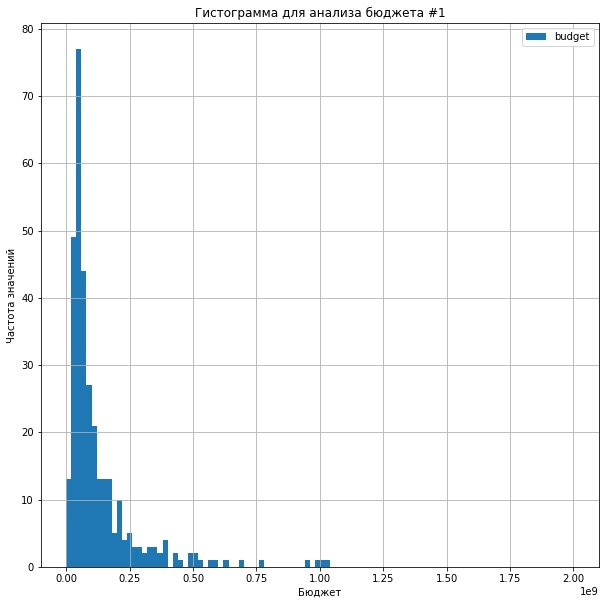

In [106]:
# Построим гистограммы, сначала на весь массив данных, а затем отберем массив данных для анализа
# На весь массив данных
data.plot(y = 'budget', kind = 'hist', bins = 100, grid=True, figsize = (10,10), range = (0,2000000000))
plt.title('Гистограмма для анализа бюджета #1');
plt.xlabel('Бюджет');
plt.ylabel('Частота значений');
plt.show()

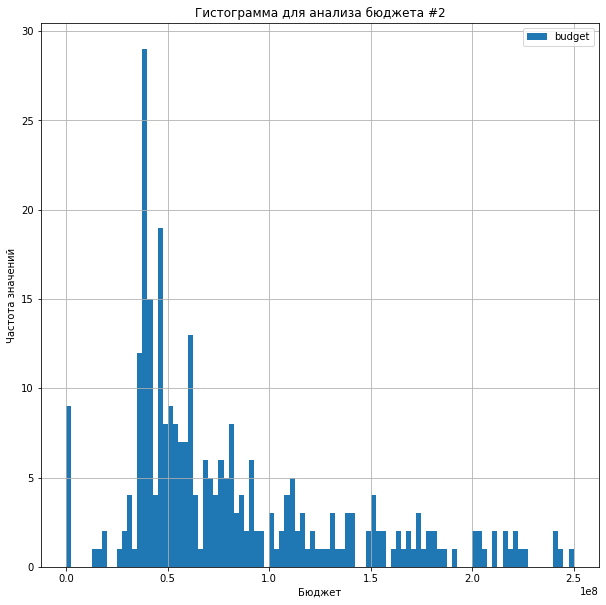

In [107]:
# Построим гистограмму на массив данных для анализа
data.plot(y = 'budget', kind = 'hist', bins = 100, grid=True, figsize = (10,10), range = (0,250000000))
plt.title('Гистограмма для анализа бюджета #2');
plt.xlabel('Бюджет');
plt.ylabel('Частота значений');
plt.show()

In [108]:
# Рассчитаем общую сумму государственной поддержки и добавим новый столбец в таблицу:
data['support'] = data['refundable_support'] + data['nonrefundable_support']

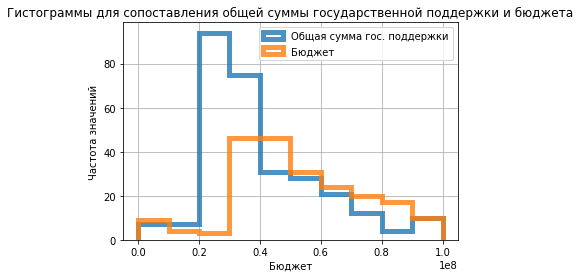

In [109]:
# Построим гистограммы по полученным данным / по общей сумме государственной поддержки и по бюджету/
ax = data.plot(
    kind='hist',
    y='support',
    histtype='step',
    range=(0, 100000000),
    bins=10,
    linewidth=5,
    alpha=0.8,
    label='Общая сумма гос. поддержки',
)

data.plot(
    kind='hist',
    y='budget',
    histtype='step',
    range=(0, 100000000),
    bins=10,
    linewidth=5,
    alpha=0.8,
    label='Бюджет',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.title('Гистограммы для сопоставления общей суммы государственной поддержки и бюджета');
plt.xlabel('Бюджет');
plt.ylabel('Частота значений');
plt.show()

По построенным гистограммам можно сделать вывод, что бюджет в большинстве случаев должен быть больше государственной поддержки.

In [110]:
# Посчитаем и добавим новый столбец, показывающий какую долю от общего бюджета фильма составляет государственная поддержка:
data['support_percent'] = data['support']/ data['budget']

In [111]:
data['support_percent'].describe()

count   332.00
mean       inf
std        NaN
min       0.04
25%       0.38
50%       0.60
75%       0.66
max        inf
Name: support_percent, dtype: float64

In [112]:
# Найдем медианное значение какую долю общего бюджета фильма составляет государственная поддержка:
data['support_percent'].median()

0.5976262473396976

Так как всего фильмов с государственнйо подержкой 332, а с нулевым бюджетом было 17 фильмов,из них для 8 фильмов мы нашли бюджет на Кинопоиске, а для оставшихся 9 фильмов считаю приемлимым для данного исследования заполнить нулевые значения как общая сумма поддержки, деленная на медианное значение (Удалить данные конечно можно, но фильмов с государственной поддержкой мало и нулевые данные занимают 2,7%, а данные по другим столбцам нам нужны для анализа).

In [113]:
# Заполним нулевые значения как общая сумма поддержки, деленная на медианное значение.
data.loc[budget_analysist_less.index, 'budget'] = (data.loc[budget_analysist_less.index, 'refundable_support'] + data.loc[budget_analysist_less.index, 'nonrefundable_support']) / (data['support_percent'].median())

In [114]:
# Проверю еще раз, есть ли значения бюджета, который меньше общей поддержки:
budget_analysist_less_2 = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
budget_analysist_less_2

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support,support_percent


Нулевых значений бюджета больше нет.

In [115]:
# Проверю проверю количество фильмов, когда значения бюджета больше общей поддержки:
budget_analysist_more_2 = data[data['budget'] > (data['refundable_support'] + data['nonrefundable_support'])]
budget_analysist_more_2.count()

title                    332
pu_number                332
show_start_date          332
type                     332
film_studio              332
production_country       332
director                 332
producer                 332
age_restriction          332
refundable_support       332
nonrefundable_support    332
budget                   332
financing_source         332
ratings                  316
genres                   332
box_office               318
support                  332
support_percent          332
dtype: int64

In [116]:
budget_analysist_more_2['title'].duplicated().sum()

0

Шаг 2.5. Вывод.

Проверил как соотносится budget с refundable_support и nonrefundable_support. Изначально сделал следующие промежуточные выводы:

* бюджет никогда не равен сумме объёма возвратных и невозврантых средств государственной поддержки;
* бюджет больше суммы объёма возвратных и невозврантых средств государственной поддержки в 315 строковых данных;
* бюджет почему то равен нулю, когда он меньше суммы объёма возвратных и невозврантых средств государственной поддержки в 17 строковых данных. Это надо исправить.

Заполнил нулевые значения 17 строк в столбце budget:
* Провел исследование как соотносится бюджет и общая поддержка (сумма возвратных и невозвратных средств государственной поддержки):
* Для 8 фильмов нашел на Кинопоиске и заполнил в таблице бюджет этих фильмов.
* Построил гистограммы для наглядности и удобства анализа, в том числе построил на одном графике гистограмму общей поддержки и гистограмму бюджета. По построенным гистограммам сделал вывод, что бюджет должен быть больше государтсвенной поддержки.
* Чтобы исключить выбросы, заполнил пропущенные 9 значений бюджета медианным значением от суммы возвратных и невозвратных средств государственной поддержки.
* Сделал итоговую проверку. Строк, когда бюджет больше суммы объёма возвратных и невозврантых средств государственной поддержки, стало 332, т.е. как раз заполнили 17 строк, где были нулевые значения бюджета.
* На кажом этапе делал проверку на дубликаты по столбцу title. Дубликатов нет.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [117]:
data['year'] = data['show_start_date'].dt.year
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support,support_percent,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,7.20,"боевик,драма,мелодрама",NaN,NaN,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,директор фильма,«6+» - для детей старше 6 лет,NaN,NaN,NaN,негосударственное финансирование,6.60,"драма,военный",NaN,NaN,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN,NaN,NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN,NaN,NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN,NaN,NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Напишем функцию. 
* Чтобы при обработке данных отбрасывать пустые значения, используем метод dropna().
* Чтобы создать отдельные столбцы с данными и в их ячейках записать значения, возвращаемые функцией, используем метод apply().
* Чтобы выделить главного режиссера и основной жанр используем метод split (), который позволяет разделить строку на подстроки по разделителю. В скобках укажем разделитель - запятую.


In [118]:
def senior(data, columns):
    for column in columns:
        data[f'senior_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

In [119]:
# Передадим f-строке названия колонок, в которых будем выделять главных
f = senior(data, ['director', 'genres'])

In [120]:
# Проверим полученные данные
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,support_percent,year,senior_director,senior_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,...,NaN,негосударственное финансирование,7.20,"боевик,драма,мелодрама",NaN,NaN,NaN,2015,кевин костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,директор фильма,«6+» - для детей старше 6 лет,NaN,...,NaN,негосударственное финансирование,6.60,"драма,военный",NaN,NaN,NaN,2016,е.матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,...,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN,NaN,NaN,2016,тимур бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,...,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN,NaN,NaN,2016,тимур бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,...,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN,NaN,NaN,2015,тимур бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

В шаге 2.5 был создан столбец support_percent как раз с долей государственная поддержка от общего бюджета фильма

In [121]:
# Строки с заполненными данными по столбцу support_percent 
data.loc[data['support_percent'].isna() == False]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,support_percent,year,senior_director,senior_genres
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",0.33,2013,а.атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",министерство культуры,NaN,без жанра,"28,140.00","26,000,000.00",0.70,2014,а.якимчук,без жанра
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",0.61,2013,р.давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",министерство культуры,4.20,драма,"55,917.50","28,000,000.00",0.69,2014,е.миндадзе (псевдоним катя шагалова),драма
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",министерство культуры,6.40,драма,"232,100.00","25,000,000.00",0.62,2014,м.угаров,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"980,000,000.00",фонд кино,6.00,"история,биография,драма","717,703,185.53","500,000,000.00",0.51,2019,а.кравчук,история
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",россия,"д.шмидт, к.феоктистов","с.сельянов, а.боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,"190,000,000.00",фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00","100,000,000.00",0.53,2019,д.шмидт,мультфильм
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"944,000,000.00",фонд кино,5.70,"фантастика,боевик",NaN,"500,000,000.00",0.53,2019,ф.бондарчук,фантастика
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",россия,и.северов,с.зернов,«12+» - для детей старше 12 лет,0.00,...,"46,154,000.00",министерство культуры,5.90,драма,NaN,"30,000,000.00",0.65,2019,и.северов,драма


In [122]:
# Было посчитано в шаге 2.5. Продублирую здесь.
# data['support_percent'].median()

In [123]:
len(temp)

7486

In [124]:
len(data)

7486

Шаг 2.6. Вывод.

1. Создал столбец с информацией о годе проката, выделив его из даты премьеры фильма.
2. Создал 2 столбца: с именем и фамилией главного режиссёра и с основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно. Для этого написал следующую функцию:
* Чтобы при обработке данных отбрасывать пустые значения, используем метод dropna().
* Чтобы создать отдельные столбцы с данными и в их ячейках записать значения, возвращаемые функцией, используем метод apply().
* Чтобы выделить главного режиссера и основной жанр используем метод split (), который позволяет разделить строку на подстроки по разделителю. В скобках укажем разделитель - запятую.
3. Создал столбец, показыввающий долю какую долю от бюджета фильма составляет  общая государственная поддержка (медианная доля общей государственной поддержки от бюджета составляет 60%).

# Шаг 2. Общий вывод.

По предобработке данных была проделана солидная работа. Сохранил количество строк, не удалив никакие данные. Теперь можно смело приступать к исследовательскому анализу данных.

Объединим выводы по каждому из проделанных шагов:

Шаг 2.1. Вывод.
Изменил типы данных в столбцах:
* show_start_date с object на datetime64, так как это в столбце содержатся данные с датой и временем;
* ratings с object на float64, так как рейтинг это числовые данные.

Шаг 2.2. Вывод.

Заполнены пропуски в следующих столбцах:

* Пропуски в столбце producer состаляли 7,6% от общего числа данных. Из полученных пропусков видно, что фильмы, где отсутствует продюссер выпущены еще в СССР. Тогда вместо продюссера была должность "Директор фильма" (иногда данная должность встречается и в настоящее время). Всего пропусков по данному столбцу 568 шт. и искать каждого продюссера (директора фильма) по названию фильма на Кинопоиске очень долго. Удалять их считаю нельзя, т.к. в этих строчках содержится важная для анализа информация по другим столбцам. Заменю пропуски на значение "Директор фильма".

* По столбцу director искал режиссеров на портале открытых данных Министерства культуры по их прокатному удостоверению и на Кинопоиске. Данных для заполнения, кроме "Мульта личности" не нашел. Пропуски режиссера в основном связаны с тем, что это концерты. Удалять их считаю нельзя, т.к. в этих строчках содержится информация по другим столбцам. Заменим пропуски на значение "Без режиссера".

Мульт личности. Выпуск 5:
    * https://www.kinopoisk.ru/series/487219/
    * https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2190480
Сразу заполнил пропуски в столбцах director,  production_country, film_studio.

* Пропуски в столбце film_studio составляли 17 строк и чтобы не заполнять их "заглушкой", искал студию-производитель на портале открытых данных Министерства культуры по их прокатному удостоверению и по названию на Кинопоиске и в поиске. По тем фильмам, где не нашел студию, поставил значение "Частная студия".
* Пропуски в столбце genres состаляли 13% от общего числа данных. Всего пропусков по данному столбцу 976 шт. и искать жанр по каждой строчке очень долго. Удалять их также считаю нельзя, т.к. в этих строчках содержится важная для анализа информация по другим столбцам. Заменил пропуски на значение "Без жанра".
* Пропускам в столбце financing_source присвоем название "негосударственное финансирование"

Пропуски остались в 5-х столбцах:
* В столбце nonrefundable_support - объём невозвратных средств государственной поддержки, раз стоят пропуски, значит не было государственной поддержки и можно было бы поставить пропускам значение ноль, но тогда будет не понятно, была ли государственная поддержка или нет. Оставим столбец nonrefundable_support без заполнения пропусков.
* В столбце refundable_support - объём возвратных средств государственной поддержки, раз стоят пропуски, значит не было государственной поддержки и  можно было бы поставить пропускам значение ноль, но тогда будет не понятно, была ли государственная поддержка или нет. Оставим столбец refundable_support без заполнения пропусков.
* Пропуски рейтинга в столбце ratings составляют 12,9% от общего количества данных. С учетом что рейтинг очень индивидуален, оставим данные пропуски без заполнения.
* Пропуски бюджета в столбце budget составляют 96% от общего количества данных, и по хорошему бы его заполнить, но с учетом что бюджет для каждого фильма очень индивидуален, оставим данные пропуски без заполнения
* Пропуски сборов в столбце box_office составляют 96% от общего количества данных, и по хорошему бы их тоже заполнить, но с учетом что сборы для каждого фильма очень индивидуальны, оставим данные пропуски без заполнения.

Шаг 2.3. Вывод.
Проверил данные на дубликаты по столбцам.
* В столбце pu_number есть 3 дубликата.
"Курбан-роман. (История с жертвой)". Номер проктаного удостоверения в строке 1797 я присвоил в первом пункте проекта. Возможно фильм не с первого раза получил прокатное удостоверение, поэтому изначально стояло значение "нет".
"Как жениться и остаться холостым" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2191663 и "Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2191664 действительно имеют один номер прокатного удотоверения.
У фильмов "Анализируй это!" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2194548 и "Анализируй то!" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2194549 дествительно имеют один номер прокатного удостоверения, но это 2 разных фильма, выпущенные в разные года.
Проанализировав данные, решения с какой-то явной логичной замены данных или удаления строк не нахожу. Предполагаю, что данные дубликаты сильно ни на что не повлияют. Оставлю их как есть.
* Проверил на дубликаты столбец title
В столбце title так же есть дубликаты. Видим (на примере фильма "Особо опасен"), что один и тот же фильм показывали в разное время и под разными проктаными удостоверениями.
Также оставим этот столбец как есть.
* В таблице есть еще очень много строковых данных. После анализа данных в стобцах:
film_studio, production_country, director, producer, age_restriction, financing_source, genres
пришел к выводу, что неявных дубликатов в данных нет. Но в столбцах production_country и genres очень много различных сочетаний стран-производства и жанров соответственно.
* В столбце type были неявные дубликаты из-за пробелов, удалил их функцией strip.

Шаг 2.4. Вывод. 
* Общую проблему могу выделить в столбцах film_studio, production_country, director, producer и genres. Данные столбцы содержат очень много сочетаний значений в рамках каждого столбца. Возможно, в идеале нужно ввести несколько столбцов вместо одного по каждой категории, например producer_1, producer_2 и т.д. Это конечно очень сильно удлинит таблицу по ширине, но оптимизирует поиск данных и анализ уникальных значений.
* В столбце type были неявные дубликаты из-за пробелов, удалил их функцией strip также в шаге 2.3. проекта.

Шаг 2.5. Вывод.

Проверил как соотносится budget с refundable_support и nonrefundable_support. Изначально сделал следующие промежуточные выводы:

* бюджет никогда не равен сумме объёма возвратных и невозврантых средств государственной поддержки;
* бюджет больше суммы объёма возвратных и невозврантых средств государственной поддержки в 315 строковых данных;
* бюджет почему то равен нулю, когда он меньше суммы объёма возвратных и невозврантых средств государственной поддержки в 17 строковых данных. Это надо исправить.

Заполнил нулевые значения 17 строк в столбце budget:
* Провел исследование как соотносится бюджет и общая поддержка (сумма возвратных и невозвратных средств государственной поддержки):
* Для 8 фильмов нашел на Кинопоиске и заполнил в таблице бюджет этих фильмов.
* Построил гистограммы для наглядности и удобства анализа, в том числе построил на одном графике гистограмму общей поддержки и гистограмму бюджета. По построенным гистограммам сделал вывод, что бюджет должен быть больше государтсвенной поддержки.
* Чтобы исключить выбросы, заполнил пропущенные 9 значений бюджета медианным значением от суммы возвратных и невозвратных средств государственной поддержки.
* Сделал итоговую проверку. Строк, когда бюджет больше суммы объёма возвратных и невозврантых средств государственной поддержки, стало 332, т.е. как раз заполнили 17 строк, где были нулевые значения бюджета.
* На кажом этапе делал проверку на дубликаты по столбцу title. Дубликатов нет.

Шаг 2.6. Вывод.

1. Создал столбец с информацией о годе проката, выделив его из даты премьеры фильма.
2. Создал 2 столбца: с именем и фамилией главного режиссёра и с основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно. Для этого написал следующую функцию:
* Чтобы при обработке данных отбрасывать пустые значения, используем метод dropna().
* Чтобы создать отдельные столбцы с данными и в их ячейках записать значения, возвращаемые функцией, используем метод apply().
* Чтобы выделить главного режиссера и основной жанр используем метод split (), который позволяет разделить строку на подстроки по разделителю. В скобках укажем разделитель - запятую.
3. Создал столбец, показыввающий долю какую долю от бюджета фильма составляет  общая государственная поддержка (медианная доля общей государственной поддержки от бюджета составляет 60%).

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Посчитаем сколько всего выходило фильмов по годам.

In [125]:
data.groupby('year').count()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support,support_percent,senior_director,senior_genres
year,,,,,,,,,,,,,,,,,,,,
2010,985,985,985,985,985,985,985,985,985,0,0,0,985,912,985,105,0,0,985,985
2011,622,622,622,622,622,622,622,622,622,0,0,0,622,576,622,109,0,0,622,622
2012,593,593,593,593,593,593,593,593,593,0,0,0,593,547,593,128,0,0,593,593
2013,630,630,630,630,630,630,630,630,630,2,2,2,630,583,630,184,2,2,630,630
2014,807,807,807,807,807,807,807,807,807,16,16,16,807,740,807,280,16,16,807,807
2015,705,705,705,705,705,705,705,705,705,86,86,86,705,623,705,465,86,86,705,705
2016,818,818,818,818,818,818,818,818,818,61,61,61,818,716,818,526,61,61,818,818
2017,505,505,505,505,505,505,505,505,505,41,41,41,505,436,505,357,41,41,505,505
2018,891,891,891,891,891,891,891,891,891,56,56,56,891,659,891,475,56,56,891,891


Теперь сколько фильмов выходило в кинотеатрах. То есть, если фильма выходил в кинотеатрах, у него должны быть заполнены данные о сборах в столбце box_office. Для этого воспользуемся методом to_frame() для преобразования серии в DataFrame.

In [126]:
movies = data.groupby('year')['box_office'].count()
movies = movies.to_frame().reset_index()
movies

,year,box_office
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,280
5,2015,465
6,2016,526
7,2017,357
8,2018,475
9,2019,530


Выясним, сколько фильмов выходило в целом в прокат каждый год и объединим с данными о прокате в кинотеатрах и расчитаем среднее количество фильмов в кинотеатре в год:

In [127]:
movies_review = data.groupby('year')['title'].count()
movies_review = movies_review.to_frame().reset_index()
movies_review.rename(columns={'title':'movies_total'}, inplace=True)
movies_review['movies_theatres'] = movies['box_office']
movies_review['theatres_ratio, %'] = (movies_review['movies_theatres']/movies_review['movies_total'])*100
movies_review['theatres_ratio, %'] = movies_review['theatres_ratio, %'].round(0) 
movies_review

,year,movies_total,movies_theatres,"theatres_ratio, %"
0,2010,985,105,11.00
1,2011,622,109,18.00
2,2012,593,128,22.00
3,2013,630,184,29.00
4,2014,807,280,35.00
5,2015,705,465,66.00
6,2016,818,526,64.00
7,2017,505,357,71.00
8,2018,891,475,53.00
9,2019,930,530,57.00


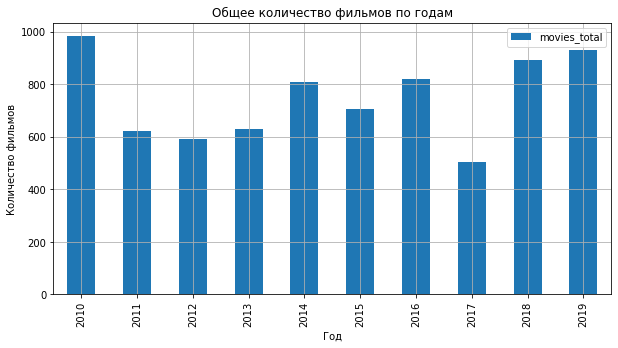

In [128]:
# Построим диаграмму по годам сначала обшего количества фильмов
movies_review.plot(x='year', y = 'movies_total', kind = 'bar', grid=True, figsize = (10,5))
plt.title('Общее количество фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Количество фильмов');
plt.show()

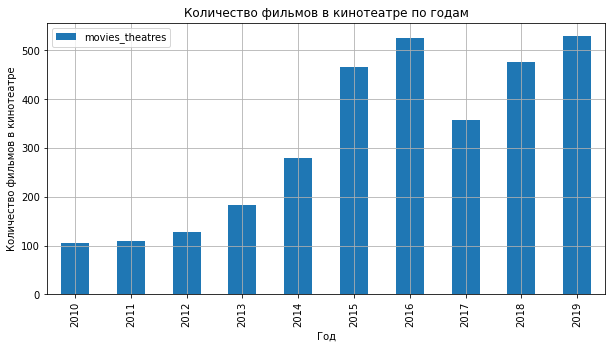

In [129]:
# И диаграмму по годам количества фильмов в кинотеатре
movies_review.plot(x='year', y = 'movies_theatres', kind = 'bar', grid=True, figsize = (10,5))
plt.title('Количество фильмов в кинотеатре по годам');
plt.xlabel('Год');
plt.ylabel('Количество фильмов в кинотеатре');
plt.show()

In [130]:
# Рассчитаем общую информацию о фильмах
print('Cреднее количество фильмов в год: %.0f' % movies_review['movies_total'].mean())
print('Cреднее количество фильмов в кинотеатрах в год: %.0f' % movies_review['movies_theatres'].mean())
print('Процент фильмов в кинотеатрах от общего количества: %.0f' % movies_review['theatres_ratio, %'].mean(), '%')

Cреднее количество фильмов в год: 749
Cреднее количество фильмов в кинотеатрах в год: 316
Процент фильмов в кинотеатрах от общего количества: 43 %


По проделанному анализу, видим, что среднее количество фильмов в год составляет 749 шт., а среднее количество фильмов в кинотеатрах в год: 316 шт.

Динамика фильмов с прокатными удостоверениями в период с 2010 на 2011 упала почти на 40%, потом постепенно росла ,с очередным падением в 2017 году. Если сравнивать количество фильмов в прокате в 2010 и в 2019, то оно практичеки равно (985 и 930 соответственно).

А вот динамика фильмов в кинотетарах выросла почти в 5 раз с 2010 по 2019гг. (105 и 530 соответственно) также с просадкой в 2017г.

Если сравнивать какой процент фильмов в кинотеатре был самый большой за год, то оказывается, это был 2017 год, когда была просадка. Доля фильмов в кинотеатре в этот год составила 71% (357 фильмов). Если же сказать о максимальном количестве фильмов в кинотеатре, то это 2019год и 530 фильмов, но процент от общего количества в прокате составляет всего 57%.

Процент фильмов в кинотеатрах от общего количества составляет 43 %

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Для проведения этого исследования вызовем метод agg(), указывающий, какие именно функции применить к заданному столбцу

In [131]:
box_office_sum = data.groupby('year')['box_office'].agg('sum')
box_office_sum

year
2010        2,428,654.00
2011       14,102,765.00
2012        6,955,423.00
2013       29,799,706.20
2014    7,444,951,859.20
2015   39,497,365,196.40
2016   47,866,299,741.91
2017   48,563,707,217.51
2018   49,668,403,134.32
2019   48,425,708,779.59
Name: box_office, dtype: float64

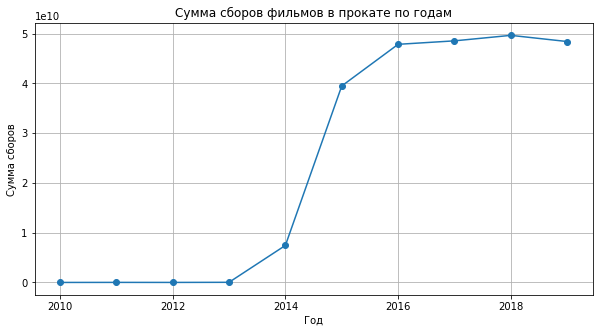

In [132]:
box_office_sum.plot(x='year', y = 'box_office', style = 'o-', grid=True, figsize = (10,5))
plt.title('Сумма сборов фильмов в прокате по годам');
plt.xlabel('Год');
plt.ylabel('Сумма сборов');
plt.show()

In [133]:
# Переведем сборы в миллиарды, чтобы суммы были нагляднее
box_office_sum_mlrd = (box_office_sum/1000000000).round(2)
box_office_sum_mlrd

year
2010    0.00
2011    0.01
2012    0.01
2013    0.03
2014    7.44
2015   39.50
2016   47.87
2017   48.56
2018   49.67
2019   48.43
Name: box_office, dtype: float64

In [134]:
# НАйдем минимальную сумму сборов за год в кинотеатрах и максимальную
box_office_sum_mlrd.apply (['min', 'max'])  

min    0.00
max   49.67
Name: box_office, dtype: float64

Данные о сборах стали собирать только с 2014 года. До этого суммы сборов собирали видимо не со всех фильмов.
Сумма сборов в динамике начиная с 2014 выросла в 2016 до определенного уровня (около 50 млрд. рублей) и начиная с 2016 года так и держится по 2019г на этом уровне (около 50 млрд. рублей).

Максимальная сумма сборов была в 2018 году - 49,67 млрд. рублей.

Минимальная сумма сборов была в 2015 году - 39,50 млрд. рублей. Период до 2015 года считаю некорректно брать, так как данные почти не собирались, а 2014 год был переходным, когда данные собирались, но не с начала года.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [135]:
# Сгруппируем данные по средней и медиане
data.groupby('year')['box_office'].agg(['mean','median']).round(0)

,mean,median
year,,
2010,"23,130.00","1,700.00"
2011,"129,383.00","3,000.00"
2012,"54,339.00","5,660.00"
2013,"161,955.00","3,522.00"
2014,"26,589,114.00","18,138.00"
2015,"84,940,570.00","4,920,933.00"
2016,"91,000,570.00","3,846,679.00"
2017,"136,032,793.00","9,968,340.00"
2018,"104,565,059.00","8,891,102.00"


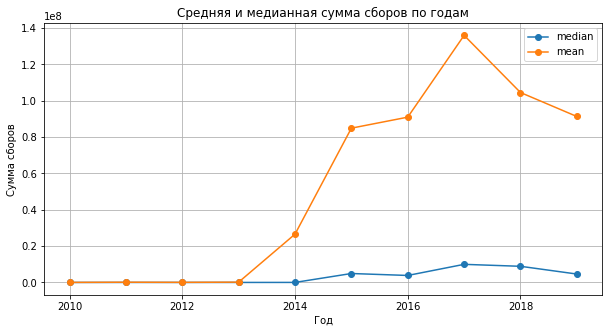

In [136]:
# Построим сразу 2 графика со средним и медианным значением сборов
(data.groupby('year')['box_office']
    .agg(['median', 'mean'])
    .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.title('Средняя и медианная сумма сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

Посчитали среднюю и медианную сумму сборов для каждого года. Постороили графики для наглядности. Период до 2014 года не смотрим. Начиная с 2014 года видим очень большую разницу, между средней суммой и медианной. Возможно это связано с кассовыми фильмами, которые очень много набирают в прокате. 2017 год для фильмов в прокате был самым успешным по сборам как в среднем, так и по медиане.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [137]:
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,support_percent,year,senior_director,senior_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,...,NaN,негосударственное финансирование,7.20,"боевик,драма,мелодрама",NaN,NaN,NaN,2015,кевин костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,директор фильма,«6+» - для детей старше 6 лет,NaN,...,NaN,негосударственное финансирование,6.60,"драма,военный",NaN,NaN,NaN,2016,е.матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,...,NaN,негосударственное финансирование,6.80,"фантастика,боевик,триллер",NaN,NaN,NaN,2016,тимур бекмамбетов,фантастика


In [138]:
# Создадим новую переменную, отфильтруем и сгруппируем данные
box_office_age = data.query('year >= 2015').groupby(['year', 'age_restriction'])['box_office'].agg('sum').reset_index()
box_office_age.head()

,year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,"379,054,578.37"
1,2015,«12+» - для детей старше 12 лет,"13,616,082,008.91"
2,2015,«16+» - для детей старше 16 лет,"11,368,120,870.27"
3,2015,«18+» - запрещено для детей,"5,432,308,367.44"
4,2015,«6+» - для детей старше 6 лет,"8,701,799,371.41"


In [139]:
def abbr (box_office_age, columns):
    for column in columns:
        box_office_age[f'abbr_{column}'] = box_office_age[column].dropna().apply(lambda x: x.split('-')[0])
    return box_office_age

In [140]:
# Передадим f-строке названия колонок, в которых будем выделять главных
f = abbr(box_office_age, ['age_restriction'])

In [141]:
box_office_age['age_restriction'] = box_office_age['abbr_age_restriction'] 
box_office_age.drop('abbr_age_restriction', axis= 1 , inplace= True )

In [142]:
box_office_age

,year,age_restriction,box_office
0,2015,«0+»,"379,054,578.37"
1,2015,«12+»,"13,616,082,008.91"
2,2015,«16+»,"11,368,120,870.27"
3,2015,«18+»,"5,432,308,367.44"
4,2015,«6+»,"8,701,799,371.41"
5,2016,«0+»,"150,228,848.67"
6,2016,«12+»,"12,204,446,524.39"
7,2016,«16+»,"16,664,548,541.74"
8,2016,«18+»,"6,793,929,818.87"
9,2016,«6+»,"12,053,146,008.24"


In [143]:
# Переименуем столбцы и приведем для наглядности значения сборов к млн. руб.
box_office_age['box_office'] = (box_office_age['box_office']/1000000).round(0)
box_office_age.rename(columns={'box_office': 'box_office_mln'}, inplace=True)
box_office_age

,year,age_restriction,box_office_mln
0,2015,«0+»,379.00
1,2015,«12+»,"13,616.00"
2,2015,«16+»,"11,368.00"
3,2015,«18+»,"5,432.00"
4,2015,«6+»,"8,702.00"
5,2016,«0+»,150.00
6,2016,«12+»,"12,204.00"
7,2016,«16+»,"16,665.00"
8,2016,«18+»,"6,794.00"
9,2016,«6+»,"12,053.00"


In [144]:
# Создадим сводную таблицу
box_office_age.pivot_table(index=['year'], columns='age_restriction', values='box_office_mln')

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
year,,,,,
2015,379.00,"13,616.00","11,368.00","5,432.00","8,702.00"
2016,150.00,"12,204.00","16,665.00","6,794.00","12,053.00"
2017,230.00,"7,851.00","18,745.00","9,651.00","12,086.00"
2018,32.00,"14,267.00","16,504.00","8,760.00","10,105.00"
2019,18.00,"12,680.00","12,753.00","10,122.00","12,853.00"


In [145]:
# Посчитаем минимальные и максимальные суммы сборов по возрастной категории
box_office_age.pivot_table(index=['year'], columns='age_restriction', values='box_office_mln').apply (['min', 'max'])

,«0+»,«12+»,«16+»,«18+»,«6+»
min,18.00,"7,851.00","11,368.00","5,432.00","8,702.00"
max,379.00,"14,267.00","18,745.00","10,122.00","12,853.00"


In [146]:
# Посчитаем общую сумму сборов по каждой возрастной категории
box_office_age.pivot_table(index=['year'], columns='age_restriction', values='box_office_mln').apply (['sum'])

,«0+»,«12+»,«16+»,«18+»,«6+»
sum,809.00,"60,618.00","76,035.00","40,759.00","55,799.00"


In [147]:
# Чтобы оставить только значения в данных и убрать нули и отсутствующие значения, воспользуемся функцией notna()
box_office_age_data = box_office_age[box_office_age['box_office_mln'].notna()]
box_office_age_data

,year,age_restriction,box_office_mln
0,2015,«0+»,379.00
1,2015,«12+»,"13,616.00"
2,2015,«16+»,"11,368.00"
3,2015,«18+»,"5,432.00"
4,2015,«6+»,"8,702.00"
5,2016,«0+»,150.00
6,2016,«12+»,"12,204.00"
7,2016,«16+»,"16,665.00"
8,2016,«18+»,"6,794.00"
9,2016,«6+»,"12,053.00"


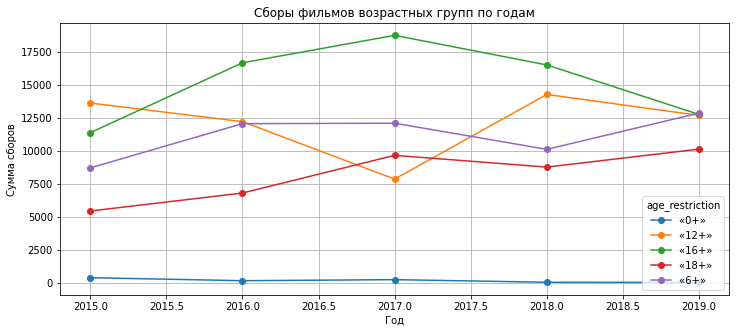

In [148]:
# Создадим сводную таблицу и построим сразу все графики
box_office_age_data.pivot_table(index='year', columns='age_restriction', values='box_office_mln', aggfunc='sum').plot(
    style='o-', grid=True, figsize=(12, 5), kind='line')
plt.title('Сборы фильмов возрастных групп по годам')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

Построим ещё диаграммы размаха.

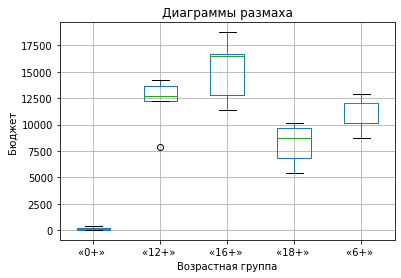

In [149]:
# Создадим сводную таблицу и построим все диаграммы размаха в зависимости от возрастной группы сразу на одном графике
box_office_age_data.pivot_table(index='year', columns='age_restriction', values='box_office_mln', aggfunc='sum').boxplot()
plt.title('Диаграммы размаха');
plt.xlabel('Возрастная группа');
plt.ylabel('Бюджет');
plt.show()

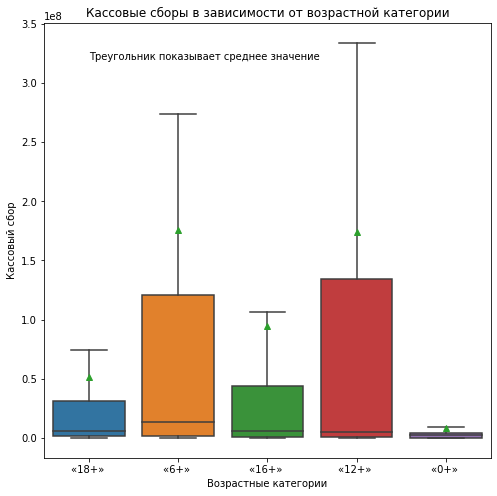

In [181]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

In [150]:
box_office_age_data.describe()

,year,box_office_mln
count,25.00,25.00
mean,"2,017.00","9,360.80"
std,1.44,"5,573.89"
min,"2,015.00",18.00
25%,"2,016.00","6,794.00"
50%,"2,017.00","10,122.00"
75%,"2,018.00","12,753.00"
max,"2,019.00","18,745.00"


По проделанной работе, отмечаем, что определенно возрастная группа влияет на сумму сборов. 
В период с 2015 по 2019гг. больше всего собрали фильмы с возрастным ограничением "16+" = 76 млрд. рублей.
В зависимости от года лидеры по сборам возрастных групп меняются. В 2015 году лидером была возрастная группа "12+". А в 2019г. возрастные группы "6+", "12+" и "16+" набрали практически одинаковые суммы.
За анализируем период с 2015 по 2019г. самый большой сбор был в 2017г. в возрастной группе "16+" и составил 18,7 млрд. рублей.
Сборы в возрастной категории "0+" показывают минимальные сборы на протяжении всего анализируемого периода. Возможно, это связано с тем, что данных картин выпускается очень мало и столь юные зрители (младше 6 лет) не оценят всех трудозатрат на производство картин и врядли высидят на одном месте условные 1,5 часа фильма. 


Шаг 3. Общий вывод.

По проделанному анализу, видим, что среднее количество фильмов в год составляет 749 шт., а среднее количество фильмов в кинотеатрах в год: 316 шт.

Динамика фильмов с прокатными удостоверениями в период с 2010 на 2011 упала почти на 40%, потом постепенно росла ,с очередным падением в 2017 году. Если сравнивать количество фильмов в прокате в 2010 и в 2019, то оно практичеки равно (985 и 930 соответственно).

А вот динамика фильмов в кинотетарах выросла почти в 5 раз с 2010 по 2019гг. (105 и 530 соответственно) также с просадкой в 2017г.

Если сравнивать какой процент фильмов в кинотеатре был самый большой за год, то оказывается, это был 2017 год, когда была просадка. Доля фильмов в кинотеатре в этот год составила 71% (357 фильмов). Если же сказать о максимальном количестве фильмов в кинотеатре, то это 2019год и 530 фильмов, но процент от общего количества в прокате составляет всего 57%.

Процент фильмов в кинотеатрах от общего количества составляет 43 %

Данные о сборах стали собирать только с 2014 года. До этого суммы сборов собирали видимо не со всех фильмов.
Сумма сборов в динамике начиная с 2014 выросла в 2016 до определенного уровня (около 50 млрд. рублей) и начиная с 2016 года так и держится по 2019г на этом уровне (около 50 млрд. рублей).

Максимальная сумма сборов была в 2018 году - 49,67 млрд. рублей.

Минимальная сумма сборов была в 2015 году - 39,50 млрд. рублей. Период до 2015 года считаю некорректно брать, так как данные почти не собирались, а 2014 год был переходным, когда данные собирались, но не с начала года.

Посчитали среднюю и медианную сумму сборов для каждого года. Постороили графики для наглядности. Период до 2014 года не смотрим. Начиная с 2014 года видим очень большую разницу, между средней суммой и медианной. Возможно это связано с кассовыми фильмами, которые очень много набирают в прокате. 2017 год для фильмов в прокате был самым успешным по сборам как в среднем, так и по медиане.

Анализируя возрастную группу фильмов отмечаем, что определенно возрастная группа влияет на сумму сборов. 
В период с 2015 по 2019гг. больше всего собрали фильмы с возрастным ограничением "16+" = 76 млрд. рублей.
В зависимости от года лидеры по сборам возрастных групп меняются. В 2015 году лидером была возрастная группа "12+". А в 2019г. возрастные группы "6+", "12+" и "16+" набрали практически одинаковые суммы.
За анализируем период с 2015 по 2019г. самый большой сбор был в 2017г. в возрастной группе "16+" и составил 18,7 млрд. рублей.
Сборы в возрастной категории "0+" показывают минимальные сборы на протяжении всего анализируемого периода. Возможно, это связано с тем, что данных картин выпускается очень мало и столь юные зрители (младше 6 лет) не оценят всех трудозатрат на производство картин и врядли высидят на одном месте условные 1,5 часа фильма. 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

В шаге 2.5, мы уже находили 332 фильма с государственной поддержкой. Создадим новую переменную, чтобы провести анализ фильмов, которые получили государственную поддержку.

In [151]:
# Создаем новую переменную с фильмами, которые получили государственную поддержку
budget_support = data[data['budget'].isna() == False]
budget_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,support_percent,year,senior_director,senior_genres
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",0.33,2013,а.атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",министерство культуры,NaN,без жанра,"28,140.00","26,000,000.00",0.70,2014,а.якимчук,без жанра
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",0.61,2013,р.давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",министерство культуры,4.20,драма,"55,917.50","28,000,000.00",0.69,2014,е.миндадзе (псевдоним катя шагалова),драма
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",министерство культуры,6.40,драма,"232,100.00","25,000,000.00",0.62,2014,м.угаров,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"980,000,000.00",фонд кино,6.00,"история,биография,драма","717,703,185.53","500,000,000.00",0.51,2019,а.кравчук,история
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",россия,"д.шмидт, к.феоктистов","с.сельянов, а.боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,"190,000,000.00",фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00","100,000,000.00",0.53,2019,д.шмидт,мультфильм
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"944,000,000.00",фонд кино,5.70,"фантастика,боевик",NaN,"500,000,000.00",0.53,2019,ф.бондарчук,фантастика
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",россия,и.северов,с.зернов,«12+» - для детей старше 12 лет,0.00,...,"46,154,000.00",министерство культуры,5.90,драма,NaN,"30,000,000.00",0.65,2019,и.северов,драма


In [152]:
# Получим основные данные по числовым значениям новой переменной.
budget_support.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,support,support_percent,year
count,332.00,332.00,332.00,332.00,316.00,318.00,332.00,332.00,332.00
mean,"111,593,819.10","11,864,457.83","48,980,988.89","134,245,270.52",6.02,"132,432,420.05","60,845,446.72",inf,"2,016.72"
std,"5,703,031.32","24,916,555.26","59,980,117.92","187,766,130.57",1.15,"334,837,856.99","72,755,459.47",NaN,1.64
min,"111,000,115.00",0.00,0.00,"10,039,719.69",1.00,"1,550.00","3,000,000.00",0.04,"2,013.00"
25%,"111,004,891.50",0.00,"25,000,000.00","46,153,971.75",5.30,"1,236,675.50","25,333,750.00",0.38,"2,015.00"
50%,"111,010,367.00",0.00,"30,000,000.00","74,955,000.00",6.20,"15,720,067.71","35,000,000.00",0.60,"2,017.00"
75%,"111,017,815.75","15,000,000.00","40,375,000.00","150,002,143.25",6.70,"106,373,008.27","60,000,000.00",0.66,"2,018.00"
max,"214,010,116.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.40,"3,073,568,690.79","500,000,000.00",inf,"2,019.00"


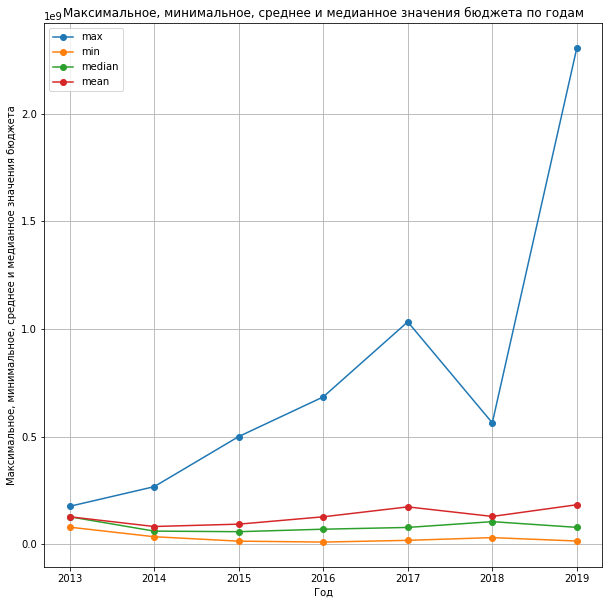

In [153]:
# budget
# Построим сразу 4 графика с максимальным, минимальным, со средним и медианным значениям бюджета
(budget_support.groupby('year')['budget']
    .agg(['max', 'min', 'median', 'mean'])
    .plot(style='o-', grid=True, figsize=(10, 10))
)
plt.title('Максимальное, минимальное, среднее и медианное значения бюджета по годам')
plt.xlabel('Год')
plt.ylabel('Максимальное, минимальное, среднее и медианное значения бюджета')
plt.show()

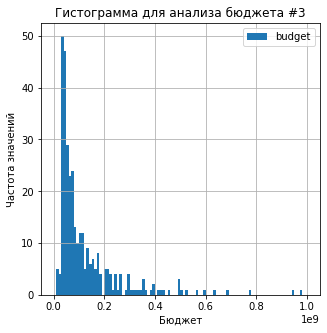

In [154]:
# Построим гистограмму бюджета
budget_support.plot(y = 'budget', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (1,1000000000))
plt.title('Гистограмма для анализа бюджета #3');
plt.xlabel('Бюджет');
plt.ylabel('Частота значений');
plt.show()
# budget_support.plot(y = 'budget', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (1,300000000))

In [155]:
# Изучим, как зависит бюджет от года выхода фильма в прокат
budget_support_budget = budget_support.pivot_table(index = 'year', values = 'budget', aggfunc = ['max', 'min', 'mean', 'median', 'count'])
budget_support_budget ['mean'] = (budget_support_budget ['mean']/1000000).round(2)
budget_support_budget ['median'] = (budget_support_budget ['median']/1000000).round(2)
budget_support_budget ['max'] = (budget_support_budget ['max']/1000000).round(2)
budget_support_budget ['min'] = (budget_support_budget ['min']/1000000).round(2)
budget_support_budget.columns = ['max', 'min', 'mean', 'median', 'count']
budget_support_budget.sort_values('median', ascending = False)

,max,min,mean,median,count
year,,,,,
2013,176.02,79.41,127.72,127.72,2
2018,563.78,30.80,129.21,105.00,56
2019,"2,305.07",15.01,183.49,78.39,70
2017,"1,032.91",18.17,173.52,78.10,41
2016,684.20,10.04,127.45,69.88,61
2014,267.29,35.00,82.37,61.04,16
2015,500.00,14.46,93.34,58.32,86


По полученным данным видим, что среднее и медианное значения бюджета фильма с государственной поддержкой находятся в пределах от 57 до 183 млн. рублей.
Есть очень большие бюджеты, как например в 2019г., когда бюджет фильмов составил 2,3 млрд. рублей при 70 фильмах в прокате.

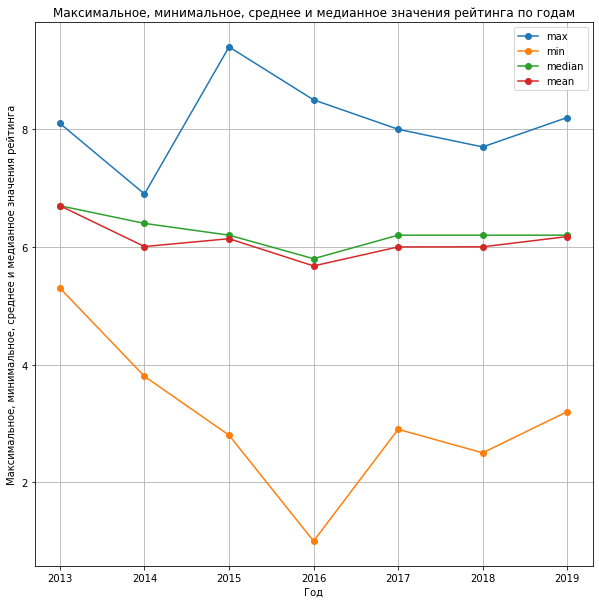

In [156]:
# ratings
# Теперь построим сразу 4 графика с максимальным, минимальным, со средним и медианным значениям рейтинга
(budget_support.groupby('year')['ratings']
    .agg(['max', 'min', 'median', 'mean'])
    .plot(style='o-', grid=True, figsize=(10, 10))
)
plt.title('Максимальное, минимальное, среднее и медианное значения рейтинга по годам')
plt.xlabel('Год')
plt.ylabel('Максимальное, минимальное, среднее и медианное значения рейтинга')
plt.show()

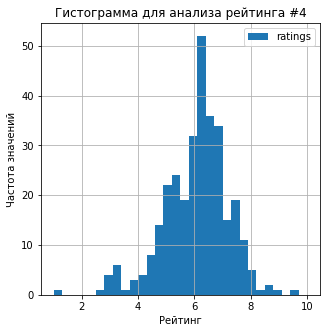

In [157]:
# Построим гистограммы по полученным данным, сначала на весь массив данных, а затем отберем массив данных для анализа
budget_support.plot(y = 'ratings', kind = 'hist', bins = 30, grid=True, figsize = (5,5), range = (1,10))
plt.title('Гистограмма для анализа рейтинга #4');
plt.xlabel('Рейтинг');
plt.ylabel('Частота значений');
plt.show()
# budget_support.plot(y = 'ratings', kind = 'hist', bins = 30, grid=True, figsize = (5,5), range = (2,9))

In [158]:
# Изучим, как зависит рейтинг от года выхода фильма в прокат
budget_support_kol = budget_support.pivot_table(index = 'year', values = 'ratings', aggfunc = ['max', 'min', 'mean', 'median', 'count'])
budget_support_kol.columns = ['max', 'min', 'mean', 'median', 'count']
budget_support_kol.sort_values('median', ascending = False)

,max,min,mean,median,count
year,,,,,
2013,8.10,5.30,6.70,6.70,2
2014,6.90,3.80,6.01,6.40,15
2015,9.40,2.80,6.14,6.20,83
2017,8.00,2.90,6.00,6.20,39
2018,7.70,2.50,6.00,6.20,53
2019,8.20,3.20,6.18,6.20,67
2016,8.50,1.00,5.68,5.80,57


По полученным данным видим, что среднее и медианное значения рейтинга фильмов с государственной поддержкой находятся в пределах от 5,7 до 6,7.
Самый высокий рейтинг был в 2015г. и составил 9,4.

In [159]:
# genres
# Найдем топ 10 жанров
budget_support['genres'].value_counts(ascending = False).head(10)

драма                             47
комедия                           32
без жанра                         16
комедия,мелодрама                 16
драма,мелодрама                    7
мелодрама                          6
комедия,семейный                   5
военный,драма,история              5
мультфильм,комедия,приключения     5
драма,криминал                     4
Name: genres, dtype: int64

In [160]:
# Отфильтруем заглушку "без жанра"
budget_support_genres = budget_support.query('genres != "без жанра"')
budget_support_genres['genres'].value_counts(ascending = False).head(10)

драма                             47
комедия                           32
комедия,мелодрама                 16
драма,мелодрама                    7
мелодрама                          6
военный,драма,история              5
комедия,семейный                   5
мультфильм,комедия,приключения     5
драма,криминал                     4
мультфильм                         4
Name: genres, dtype: int64

По полученным данным видим, что чаще всего производят драмы (47 фильмов), комедии (32 фильма) и комедийные мелодрамы (16 фильмов).

In [161]:
# senior_genres
# Теперь топ 10 главных жанров
budget_support['senior_genres'].value_counts(ascending = False).head(10)

драма         93
комедия       74
мультфильм    31
без жанра     16
мелодрама     15
триллер       15
фантастика    11
фэнтези       11
ужасы         10
военный        9
Name: senior_genres, dtype: int64

In [162]:
# Отфильтруем заглушку "без жанра"
budget_support_senior_genres = budget_support.query('senior_genres != "без жанра"')
budget_support_senior_genres['senior_genres'].value_counts(ascending = False).head(10)

драма         93
комедия       74
мультфильм    31
триллер       15
мелодрама     15
фэнтези       11
фантастика    11
ужасы         10
военный        9
семейный       7
Name: senior_genres, dtype: int64

При выделении главных жанров, драма продолжает удерживать первое место по производству (93 фильма), на втором месте также комедия (74 фильма) и на третье место вырвались мультфильмы (31 фильм).

In [163]:
# financing_source
# Изучим как распределяются источники государственного финансирования
budget_support['financing_source'].value_counts(ascending = False)

министерство культуры               164
фонд кино                           146
министерство культуры, фонд кино     22
Name: financing_source, dtype: int64

Финансирование в основном осуществляется из какого-нибудь одного источника государственного финансирования. Совместное финансирование также есть, но составялет 6,6%.

In [164]:
# type
# Изучим как распределяются типы фильмов с государственным финансированием
budget_support['type'].value_counts(ascending = False)

художественный    300
анимационный       31
документальный      1
Name: type, dtype: int64

В основном снимают художественные фильмы (90% фильмов), почти 10% анимационные фильмы и даже сняли 1 документальный фильм.

In [165]:
# production_country
# Изучим какая страна-производитель с государственным финансированием
budget_support['production_country'].value_counts(ascending = False)

россия                                        316
россия, германия                                2
россия, италия                                  2
россия, армения                                 1
россия, бельгия, финляндия                      1
россия, украина, польша                         1
россия, латвия, чешская республика              1
россия, сербия                                  1
россия, франция, латвия                         1
россия, германия, казахстан, польша, китай      1
россия - грузия                                 1
россия-китай                                    1
россия-словакия-чехия                           1
россия, германия, великобритания                1
россия-украина                                  1
Name: production_country, dtype: int64

Страна производства фильмов естественно Россия, но на мое удивление есть некоторые фильмы которые снимают также в других странах.

In [166]:
# film_studio
# Изучим топ-10 студий-производителей фильмов с государственным финансированием
budget_support['film_studio'].value_counts(ascending = False).head(10)

ооо "студия анимационного кино "мельница"    7
ооо "таббак"                                 6
ооо "кинокомпания "ств"                      6
ооо "продюсерский центр "ленфильм"           4
ооо "визарт фильм"                           4
ооо "каро продакшн"                          4
ооо "киностудия "вертикаль"                  4
ооо "лицензионные бренды"                    3
ооо "ввп альянс"                             3
ооо "артлайт"                                3
Name: film_studio, dtype: int64

По студиям-производителям фильмов с государственным финансированием явных лидиров нет. Первое место заняла студия ООО "Студия анимационного кино "Мельница" (7 фильмов), второе поделили ООО "Таббак" и ООО "Кинокомпания "СТВ" (по 6 фильмов).

In [167]:
# director
# Изучим топ-10 режиссёров фильмов с государственным финансированием
budget_support['director'].value_counts(ascending = False).head(10)

д.дьяченко       4
с.андреасян      4
р.давлетьяров    4
с.мокрицкий      3
к.шипенко        3
н.хомерики       3
а.аксененко      3
в.глаголева      2
а.галибин        2
а.волгин         2
Name: director, dtype: int64

Топ-3 режиссёров: С.Андреасян, Д.Дьяченко, Р.Давлетьяров (все по 4 фильма).

In [168]:
# senior_director
# Изучим топ-10 главных режиссёров фильмов с государственным финансированием
budget_support['senior_director'].value_counts(ascending = False).head(10)

р.давлетьяров    5
д.дьяченко       4
с.андреасян      4
а.аксененко      3
к.шипенко        3
д.шмидт          3
а.котт           3
с.мокрицкий      3
а.цицилин        3
н.хомерики       3
Name: senior_director, dtype: int64

Топ-3 главных режиссёров: Р.Давлетьяров  (5 фильмов) и С.Андреасян, Д.Дьяченко (по 4 фильма).

In [169]:
# producer
# Изучим топ-10 продюссеров фильмов с государственным финансированием
budget_support['producer'].value_counts(ascending = False).head(10)

с.сельянов                   8
с.сельянов, а.боярский       7
с.говорухин, е.маскина       4
р.дишдишян, ооо "мме"        3
н.мокрицкая                  3
ооо "лицензионные бренды"    3
в.денисюк, е.мелентьев       3
а.тютрюмов                   3
с.еремеева                   3
э.пичугин                    3
Name: producer, dtype: int64

Топ-3 продюссеров: С.Сельянов (8 фильмов); С.Сельянов, А.Боярский (7 фильмов); С.Говорухин, Е.Маскина (4 фильма).

In [170]:
# age_restriction
# Изучим какие фильмы с возрастными ограничениями производятся с государственным финансированием
budget_support['age_restriction'].value_counts(ascending = False)

«16+» - для детей старше 16 лет           125
«12+» - для детей старше 12 лет           106
«6+» - для детей старше 6 лет              65
«18+» - запрещено для детей                28
«0+» - для любой зрительской аудитории      8
Name: age_restriction, dtype: int64

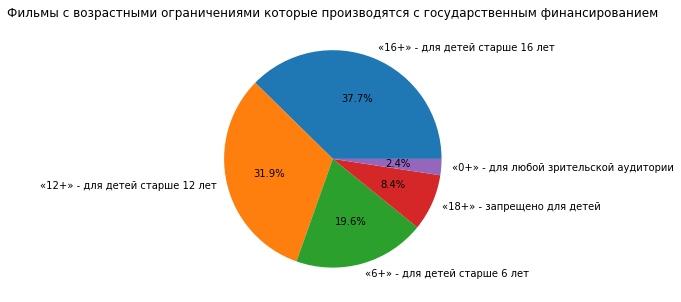

In [171]:
# Построим диаграмму фильмов с возрастными ограничениями, которые производятся с государственным финансированием
budget_support['age_restriction'].value_counts().plot(y='count', kind='pie', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Фильмы с возрастными ограничениями которые производятся с государственным финансированием')
plt.ylabel("");
plt.show()

Чаще всего снимают фильмы с возрастным ограничением "16+" (125 фильмов), второе место "12+" (106 фильмов), третье место "6+" (65 фильмов).

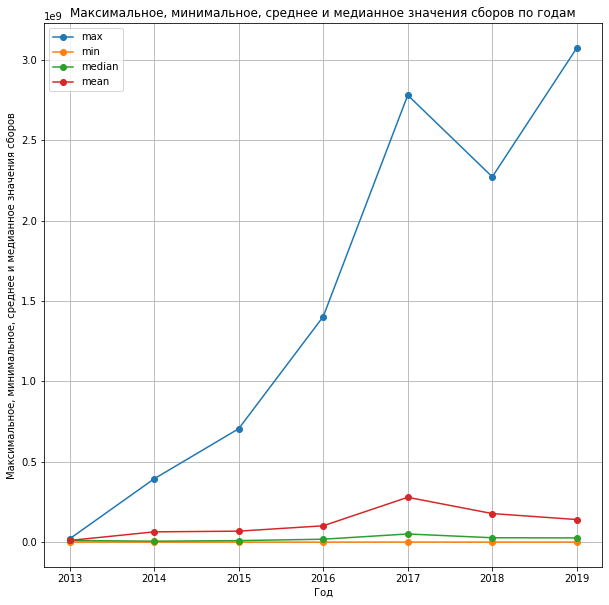

In [172]:
# box_office
# Изучим сборы фильмов с государственным финансированием
# Построим сразу 4 графика с максимальным, минимальным, со средним и медианным значениям сборов
(budget_support.groupby('year')['box_office']
    .agg(['max', 'min', 'median', 'mean'])
    .plot(style='o-', grid=True, figsize=(10, 10))
)
plt.title('Максимальное, минимальное, среднее и медианное значения сборов по годам')
plt.xlabel('Год')
plt.ylabel('Максимальное, минимальное, среднее и медианное значения сборов')
plt.show()

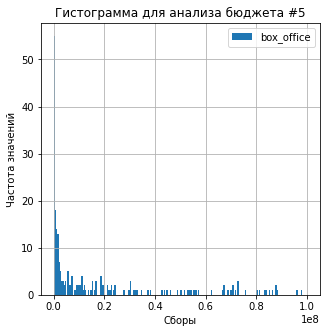

In [173]:
# Построим гистограммe по полученным данным
budget_support.plot(y = 'box_office', kind = 'hist', bins = 200, grid=True, figsize = (5,5), range = (0,100000000))
plt.title('Гистограмма для анализа бюджета #5');
plt.xlabel('Сборы');
plt.ylabel('Частота значений');
plt.show()

# budget_support.plot(y = 'box_office', kind = 'hist', bins = 200, grid=True, figsize = (5,5), range = (0,3000000))

In [174]:
# Изучим, как зависят сборы от года выхода фильма в прокат
budget_support_box_office = budget_support.pivot_table(index = 'year', values = 'box_office', aggfunc = ['max', 'min', 'mean', 'median', 'count'])
budget_support_box_office['mean'] = (budget_support_box_office['mean']/1000000).round(2)
budget_support_box_office['median'] = (budget_support_box_office['median']/1000000).round(2)
budget_support_box_office['max'] = (budget_support_box_office['max']/1000000).round(2)
budget_support_box_office['min'] = (budget_support_box_office['min']/1000000).round(2)
budget_support_box_office.columns = ['max', 'min', 'mean', 'median', 'count']
budget_support_box_office.sort_values('median', ascending = False)

,max,min,mean,median,count
year,,,,,
2017,"2,779.69",0.17,278.59,50.45,39
2018,"2,271.75",0.06,177.39,27.02,56
2019,"3,073.57",0.08,140.16,25.98,60
2016,"1,402.26",0.01,101.36,17.92,60
2013,19.96,0.37,10.16,10.16,2
2015,704.93,0.00,68.06,9.20,85
2014,393.34,0.03,63.59,5.50,16


Сборы фильмов с государственной поддержкой очень сильно разнятся по годам. Медианные значения от 5,5 млн. рублей до 50,5 млн. рублей. Средние значения от 10 млн. до 278 млн. рублей за счет кассовых фильмов. 

Самый удачный год для фильмов с государственным финансирвоанием 2017. В этот год самая большая средняя и медианная при 39 выпущенных фильмах. И почти самый большой сбор 2,7 млрд. рублей. (не считая 2019год с 3 млрд. рублей)

Создадим новый столбец окупаемости фильмов (создадим в существующей переменной, чтобы не расширять исходный датафрейм и так как нам эти данные нужны чисто для текущего анализа).

In [175]:
# Создадим новый столбец payback
budget_support['payback'] = budget_support['box_office'] - budget_support['budget']
budget_support

/tmp/ipykernel_166/959019254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_support['payback'] = budget_support['box_office'] - budget_support['budget']


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,support,support_percent,year,senior_director,senior_genres,payback
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,...,министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",0.33,2013,а.атанесян,драма,"-79,046,546.40"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,...,министерство культуры,NaN,без жанра,"28,140.00","26,000,000.00",0.70,2014,а.якимчук,без жанра,"-37,114,717.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,...,фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",0.61,2013,р.давлетьяров,комедия,"-156,066,458.50"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.00,...,министерство культуры,4.20,драма,"55,917.50","28,000,000.00",0.69,2014,е.миндадзе (псевдоним катя шагалова),драма,"-40,518,222.50"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.00,...,министерство культуры,6.40,драма,"232,100.00","25,000,000.00",0.62,2014,м.угаров,драма,"-39,783,022.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,фонд кино,6.00,"история,биография,драма","717,703,185.53","500,000,000.00",0.51,2019,а.кравчук,история,"-262,296,814.47"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",россия,"д.шмидт, к.феоктистов","с.сельянов, а.боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00","100,000,000.00",0.53,2019,д.шмидт,мультфильм,"311,069,235.00"
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,фонд кино,5.70,"фантастика,боевик",NaN,"500,000,000.00",0.53,2019,ф.бондарчук,фантастика,NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",россия,и.северов,с.зернов,«12+» - для детей старше 12 лет,0.00,...,министерство культуры,5.90,драма,NaN,"30,000,000.00",0.65,2019,и.северов,драма,NaN


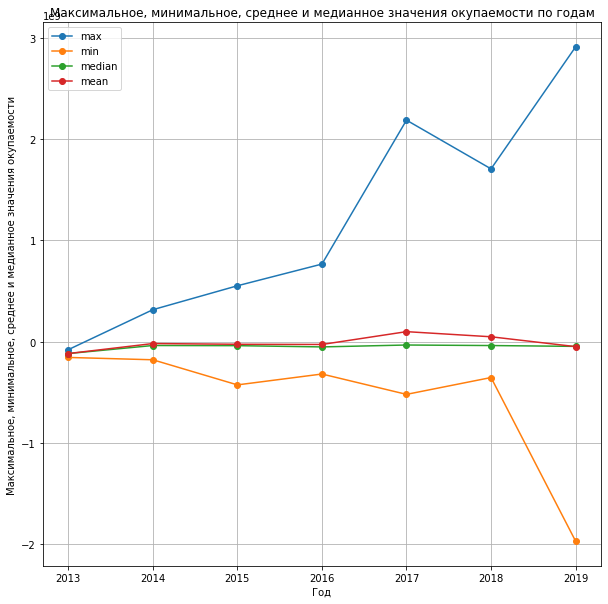

In [176]:
# Построим сразу 4 графика с максимальным, минимальным, со средним и медианным значениям окупаемости
(budget_support.groupby('year')['payback']
    .agg(['max', 'min', 'median', 'mean'])
    .plot(style='o-', grid=True, figsize=(10, 10))
)
plt.title('Максимальное, минимальное, среднее и медианное значения окупаемости по годам')
plt.xlabel('Год')
plt.ylabel('Максимальное, минимальное, среднее и медианное значения окупаемости')
plt.show()

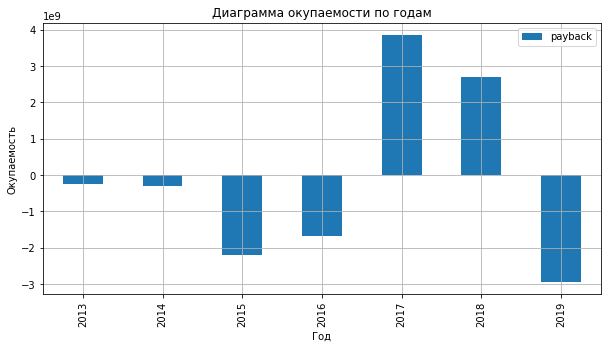

In [177]:
# Построим диаграмму окупаемости по годам
budget_support.groupby('year').sum().plot(y = 'payback', kind = 'bar', grid=True, figsize = (10,5))
plt.title('Диаграмма окупаемости по годам');
plt.xlabel('Год');
plt.ylabel('Окупаемость');
plt.show()

In [178]:
# Изучим, как зависит окупаемость от года выхода фильма в прокат
budget_support_budget = budget_support.pivot_table(index = 'year', values = 'payback', aggfunc = ['max', 'min', 'mean', 'median', 'count'])
budget_support_budget ['mean'] = (budget_support_budget ['mean']/1000000).round(2)
budget_support_budget ['median'] = (budget_support_budget ['median']/1000000).round(2)
budget_support_budget ['max'] = (budget_support_budget ['max']/1000000).round(2)
budget_support_budget ['min'] = (budget_support_budget ['min']/1000000).round(2)
budget_support_budget.columns = ['max', 'min', 'mean', 'median', 'count']
budget_support_budget.sort_values('median', ascending = False)

,max,min,mean,median,count
year,,,,,
2017,"2,189.49",-521.13,98.88,-33.22,39
2014,315.94,-179.17,-18.78,-38.12,16
2018,"1,707.97",-354.67,48.19,-38.50,56
2015,552.41,-427.42,-25.88,-39.67,85
2019,"2,913.57","-1,971.48",-49.11,-46.68,60
2016,766.97,-319.92,-27.90,-52.01,60
2013,-79.05,-156.07,-117.56,-117.56,2


Как видим, фильмы с государственной поддержкой почти никогда не окупаются. И даже в самый прибыльный 2017 год при средней окупаемости 99 млн. рублей, медианная была все равно минус 33 млн. рубля.

Самая же максимальная окупаемость была в 2019 году при выпущенных 60 фильмах.

Шаг 4. Вывод.

Вывод для меня достаточно неожиданный, фильмы с государственной поддержкой очень редко окупаются.

Распишем по пунктам, полученные заключения по проделанному анализу фильмов с государственной поддержкой:
* Среднее и медианное значения бюджета фильма с государственной поддержкой находятся в пределах от 57 до 128 млн. рублей. Есть очень большие бюджеты, как например в 2019г., когда бюджет фильмов составил 2,3 млрд. рублей при 70 фильмах в прокате.
* Среднее и медианное значения рейтинга фильмов с государственной поддержкой находятся в пределах от 5,7 до 6,7. Самый высокий рейтинг был в 2015г. и составил 9,4.
* Чаще всего производят драмы (47 фильмов), комедии (32 фильма) и комедийные мелодрамы (16 фильмов).
* При выделении главных жанров, драма продолжает удерживать первое место по производству (93 фильма), на втором месте также комедия (74 фильма) и на третье место вырвались мультфильмы (31 фильм).
* Финансирование в основном осуществляется из какого-нибудь одного источника государственного финансирования. Совместное финансирование также есть, но составялет 6,6%.
* В основном снимают художественные фильмы (90% фильмов), почти 10% анимационные фильмы и даже сняли 1 документальный фильм.
* Страна производства фильмов естественно Россия, но на есть некоторые фильмы которые снимают еще и в других странах.
* По студиям-производителям фильмов с государственным финансированием явных лидиров нет. Первое место заняла студия ООО "Студия анимационного кино "Мельница" (7 фильмов), второе поделили ООО "Таббак" и ООО "Кинокомпания "СТВ" (по 6 фильмов).
* Топ-3 режиссёров: С.Андреасян, Д.Дьяченко, Р.Давлетьяров (все по 4 фильма).
* Топ-3 главных режиссёров: Р.Давлетьяров  (5 фильмов) и С.Андреасян, Д.Дьяченко (по 4 фильма).
* Топ-3 продюссеров: С.Сельянов (8 фильмов); С.Сельянов, А.Боярский (7 фильмов); С.Говорухин, Е.Маскина (4 фильма).
* Чаще всего снимают фильмы с возрастным ограничением "16+" (125 фильмов), второе место "12+" (106 фильмов), третье место "6+" (65 фильмов).
* Сборы фильмов с государственной поддержкой очень сильно разнятся по годам. Медианные значения от 5,5 млн. рублей до 50,5 млн. рублей. Средние значения от 10 млн. до 278 млн. рублей за счет кассовых фильмов. 
* Самый удачный год для фильмов с государственным финансированием 2017-ый. В этот год самая большая средняя и медианная при 39 выпущенных фильмах и почти самый большой сбор 2,7 млрд. рублей. (не считая 2019год с 3 млрд. рублей)
* Фильмы с государственной поддержкой почти никогда не окупаются. И даже в самый прибыльный 2017 год при средней окупаемости 99 млн. рублей, медианная окупаемость была все равно минус 33 млн. рубля при 39 выпущенных фильмах. Самая максимальная окупаемость была в 2019 году при выпущенных 60 фильмах.

### Шаг 5. Напишите общий вывод

Общий вывод.

При производстве фильмов очень важно учитывать аудиторию, на которую будет рассчитано выпускаемое кино. Самыми кассовыми категориями являются "12+" и "16+" как при производстве фильмов с государственным финансированием, так и негосударственным.

2017 год стал самым прибыльным для фильмов. В этот год их было выпущено почти на 40% меньше по сравнению с 2016-ым и 2018-ым годами, но сборы были самыми большими как для всех фильмов, так и для фильмов с с государственным финансированием.

Фильмы же с государственной поддержкой почти никогда не окупаются. И даже в самый прибыльный 2017 год при средней окупаемости 99 млн. рублей, их медианная окупаемость была все равно минус 33 млн. рубля при 39 выпущенных фильмах за год.

Средний процент фильмов в кинотеатрах от общего количества составляет 43 % за весь анализируемый период.

Объединим для удобства и напишем все выводы по проделанным шагам.

Шаг 1. Вывод.
* Изучил общую информацию по двум датафемам;
* Нашел и исправил некорректные значения и данные в столбце puNumber;
* Объединил датафреймы методом merge и создал новый датафрейм;
* Привел название столбца puNumber к правилу "красивого кода" - pu_number;
* В данных есть очень много пропусков и есть несоответствие содержимого типу данных.
* Сделал проверку на явные дубликаты. Явных дубликатов в файле нет.
* Построенные гистограммы позволили визуализировать числовые значения ячеек, но выводы по ним преждевременно делать, так как нужно выполнить предобработку данных.

Шаг 2. Общий вывод.

По предобработке данных была проделана солидная работа. Сохранил количество строк, не удалив никакие данные. Теперь можно смело приступать к исследовательскому анализу данных.

Объединим выводы по каждому из проделанных шагов:

Шаг 2.1. Вывод.
Изменил типы данных в столбцах:
* show_start_date с object на datetime64, так как это в столбце содержатся данные с датой и временем;
* ratings с object на float64, так как рейтинг это числовые данные.

Шаг 2.2. Вывод.

Заполнены пропуски в следующих столбцах:

* Пропуски в столбце producer состаляли 7,6% от общего числа данных. Из полученных пропусков видно, что фильмы, где отсутствует продюссер выпущены еще в СССР. Тогда вместо продюссера была должность "Директор фильма" (иногда данная должность встречается и в настоящее время). Всего пропусков по данному столбцу 568 шт. и искать каждого продюссера (директора фильма) по названию фильма на Кинопоиске очень долго. Удалять их считаю нельзя, т.к. в этих строчках содержится важная для анализа информация по другим столбцам. Заменю пропуски на значение "Директор фильма".

* По столбцу director искал режиссеров на портале открытых данных Министерства культуры по их прокатному удостоверению и на Кинопоиске. Данных для заполнения, кроме "Мульта личности" не нашел. Пропуски режиссера в основном связаны с тем, что это концерты. Удалять их считаю нельзя, т.к. в этих строчках содержится информация по другим столбцам. Заменим пропуски на значение "Без режиссера".

Мульт личности. Выпуск 5:
    * https://www.kinopoisk.ru/series/487219/
    * https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2190480
Сразу заполнил пропуски в столбцах director,  production_country, film_studio.

* Пропуски в столбце film_studio составляли 17 строк и чтобы не заполнять их "заглушкой", искал студию-производитель на портале открытых данных Министерства культуры по их прокатному удостоверению и по названию на Кинопоиске и в поиске. По тем фильмам, где не нашел студию, поставил значение "Частная студия".
* Пропуски в столбце genres состаляли 13% от общего числа данных. Всего пропусков по данному столбцу 976 шт. и искать жанр по каждой строчке очень долго. Удалять их также считаю нельзя, т.к. в этих строчках содержится важная для анализа информация по другим столбцам. Заменил пропуски на значение "Без жанра".
* Пропускам в столбце financing_source присвоем название "негосударственное финансирование"

Пропуски остались в 5-х столбцах:
* В столбце nonrefundable_support - объём невозвратных средств государственной поддержки, раз стоят пропуски, значит не было государственной поддержки и можно было бы поставить пропускам значение ноль, но тогда будет не понятно, была ли государственная поддержка или нет. Оставим столбец nonrefundable_support без заполнения пропусков.
* В столбце refundable_support - объём возвратных средств государственной поддержки, раз стоят пропуски, значит не было государственной поддержки и  можно было бы поставить пропускам значение ноль, но тогда будет не понятно, была ли государственная поддержка или нет. Оставим столбец refundable_support без заполнения пропусков.
* Пропуски рейтинга в столбце ratings составляют 12,9% от общего количества данных. С учетом что рейтинг очень индивидуален, оставим данные пропуски без заполнения.
* Пропуски бюджета в столбце budget составляют 96% от общего количества данных, и по хорошему бы его заполнить, но с учетом что бюджет для каждого фильма очень индивидуален, оставим данные пропуски без заполнения
* Пропуски сборов в столбце box_office составляют 96% от общего количества данных, и по хорошему бы их тоже заполнить, но с учетом что сборы для каждого фильма очень индивидуальны, оставим данные пропуски без заполнения.

Шаг 2.3. Вывод.
Проверил данные на дубликаты по столбцам.
* В столбце pu_number есть 3 дубликата.
"Курбан-роман. (История с жертвой)". Номер проктаного удостоверения в строке 1797 я присвоил в первом пункте проекта. Возможно фильм не с первого раза получил прокатное удостоверение, поэтому изначально стояло значение "нет".
"Как жениться и остаться холостым" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2191663 и "Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2191664 действительно имеют один номер прокатного удотоверения.
У фильмов "Анализируй это!" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2194548 и "Анализируй то!" https://opendata.mkrf.ru/opendata/7705851331-register_movies/7/2194549 дествительно имеют один номер прокатного удостоверения, но это 2 разных фильма, выпущенные в разные года.
Проанализировав данные, решения с какой-то явной логичной замены данных или удаления строк не нахожу. Предполагаю, что данные дубликаты сильно ни на что не повлияют. Оставлю их как есть.
* Проверил на дубликаты столбец title
В столбце title так же есть дубликаты. Видим (на примере фильма "Особо опасен"), что один и тот же фильм показывали в разное время и под разными проктаными удостоверениями.
Также оставим этот столбец как есть.
* В таблице есть еще очень много строковых данных. После анализа данных в стобцах:
film_studio, production_country, director, producer, age_restriction, financing_source, genres
пришел к выводу, что неявных дубликатов в данных нет. Но в столбцах production_country и genres очень много различных сочетаний стран-производства и жанров соответственно.
* В столбце type были неявные дубликаты из-за пробелов, удалил их функцией strip.

Шаг 2.4. Вывод. 
* Общую проблему могу выделить в столбцах film_studio, production_country, director, producer и genres. Данные столбцы содержат очень много сочетаний значений в рамках каждого столбца. Возможно, в идеале нужно ввести несколько столбцов вместо одного по каждой категории, например producer_1, producer_2 и т.д. Это конечно очень сильно удлинит таблицу по ширине, но оптимизирует поиск данных и анализ уникальных значений.
* В столбце type были неявные дубликаты из-за пробелов, удалил их функцией strip также в шаге 2.3. проекта.

Шаг 2.5. Вывод.

Проверил как соотносится budget с refundable_support и nonrefundable_support. Изначально сделал следующие промежуточные выводы:

* бюджет никогда не равен сумме объёма возвратных и невозврантых средств государственной поддержки;
* бюджет больше суммы объёма возвратных и невозврантых средств государственной поддержки в 315 строковых данных;
* бюджет почему то равен нулю, когда он меньше суммы объёма возвратных и невозврантых средств государственной поддержки в 17 строковых данных. Это надо исправить.

Заполнил нулевые значения 17 строк в столбце budget:
* Провел исследование как соотносится бюджет и общая поддержка (сумма возвратных и невозвратных средств государственной поддержки):
* Для 8 фильмов нашел на Кинопоиске и заполнил в таблице бюджет этих фильмов.
* Построил гистограммы для наглядности и удобства анализа, в том числе построил на одном графике гистограмму общей поддержки и гистограмму бюджета. По построенным гистограммам сделал вывод, что бюджет должен быть больше государтсвенной поддержки.
* Чтобы исключить выбросы, заполнил пропущенные 9 значений бюджета медианным значением от суммы возвратных и невозвратных средств государственной поддержки.
* Сделал итоговую проверку. Строк, когда бюджет больше суммы объёма возвратных и невозврантых средств государственной поддержки, стало 332, т.е. как раз заполнили 17 строк, где были нулевые значения бюджета.
* На кажом этапе делал проверку на дубликаты по столбцу title. Дубликатов нет.

Шаг 2.6. Вывод.

1. Создал столбец с информацией о годе проката, выделив его из даты премьеры фильма.
2. Создал 2 столбца: с именем и фамилией главного режиссёра и с основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно. Для этого написал следующую функцию:
* Чтобы при обработке данных отбрасывать пустые значения, используем метод dropna().
* Чтобы создать отдельные столбцы с данными и в их ячейках записать значения, возвращаемые функцией, используем метод apply().
* Чтобы выделить главного режиссера и основной жанр используем метод split (), который позволяет разделить строку на подстроки по разделителю. В скобках укажем разделитель - запятую.
3. Создал столбец, показыввающий долю какую долю от бюджета фильма составляет  общая государственная поддержка (медианная доля общей государственной поддержки от бюджета составляет 60%).

Шаг 3. Общий вывод.

По проделанному анализу, видим, что среднее количество фильмов в год составляет 749 шт., а среднее количество фильмов в кинотеатрах в год: 316 шт.

Динамика фильмов с прокатными удостоверениями в период с 2010 на 2011 упала почти на 40%, потом постепенно росла ,с очередным падением в 2017 году. Если сравнивать количество фильмов в прокате в 2010 и в 2019, то оно практичеки равно (985 и 930 соответственно).

А вот динамика фильмов в кинотетарах выросла почти в 5 раз с 2010 по 2019гг. (105 и 530 соответственно) также с просадкой в 2017г.

Если сравнивать какой процент фильмов в кинотеатре был самый большой за год, то оказывается, это был 2017 год, когда была просадка. Доля фильмов в кинотеатре в этот год составила 71% (357 фильмов). Если же сказать о максимальном количестве фильмов в кинотеатре, то это 2019год и 530 фильмов, но процент от общего количества в прокате составляет всего 57%.

Процент фильмов в кинотеатрах от общего количества составляет 43 %

Данные о сборах стали собирать только с 2014 года. До этого суммы сборов собирали видимо не со всех фильмов.
Сумма сборов в динамике начиная с 2014 выросла в 2016 до определенного уровня (около 50 млрд. рублей) и начиная с 2016 года так и держится по 2019г на этом уровне (около 50 млрд. рублей).

Максимальная сумма сборов была в 2018 году - 49,67 млрд. рублей.

Минимальная сумма сборов была в 2015 году - 39,50 млрд. рублей. Период до 2015 года считаю некорректно брать, так как данные почти не собирались, а 2014 год был переходным, когда данные собирались, но не с начала года.

Посчитали среднюю и медианную сумму сборов для каждого года. Постороили графики для наглядности. Период до 2014 года не смотрим. Начиная с 2014 года видим очень большую разницу, между средней суммой и медианной. Возможно это связано с кассовыми фильмами, которые очень много набирают в прокате. 2017 год для фильмов в прокате был самым успешным по сборам как в среднем, так и по медиане.

Анализируя возрастную группу фильмов отмечаем, что определенно возрастная группа влияет на сумму сборов. 
В период с 2015 по 2019гг. больше всего собрали фильмы с возрастным ограничением "16+" = 76 млрд. рублей.
В зависимости от года лидеры по сборам возрастных групп меняются. В 2015 году лидером была возрастная группа "12+". А в 2019г. возрастные группы "6+", "12+" и "16+" набрали практически одинаковые суммы.
За анализируем период с 2015 по 2019г. самый большой сбор был в 2017г. в возрастной группе "16+" и составил 18,7 млрд. рублей.
Сборы в возрастной категории "0+" показывают минимальные сборы на протяжении всего анализируемого периода. Возможно, это связано с тем, что данных картин выпускается очень мало и столь юные зрители (младше 6 лет) не оценят всех трудозатрат на производство картин и врядли высидят на одном месте условные 1,5 часа фильма. 

Шаг 4. Вывод.

Вывод для меня достаточно неожиданный, фильмы с государственной поддержкой очень редко окупаются.

Распишем по пунктам, полученные заключения по проделанному анализу фильмов с государственной поддержкой:
* Среднее и медианное значения бюджета фильма с государственной поддержкой находятся в пределах от 57 до 128 млн. рублей. Есть очень большие бюджеты, как например в 2019г., когда бюджет фильмов составил 2,3 млрд. рублей при 70 фильмах в прокате.
* Среднее и медианное значения рейтинга фильмов с государственной поддержкой находятся в пределах от 5,7 до 6,7. Самый высокий рейтинг был в 2015г. и составил 9,4.
* Чаще всего производят драмы (47 фильмов), комедии (32 фильма) и комедийные мелодрамы (16 фильмов).
* При выделении главных жанров, драма продолжает удерживать первое место по производству (93 фильма), на втором месте также комедия (74 фильма) и на третье место вырвались мультфильмы (31 фильм).
* Финансирование в основном осуществляется из какого-нибудь одного источника государственного финансирования. Совместное финансирование также есть, но составялет 6,6%.
* В основном снимают художественные фильмы (90% фильмов), почти 10% анимационные фильмы и даже сняли 1 документальный фильм.
* Страна производства фильмов естественно Россия, но на есть некоторые фильмы которые снимают еще и в других странах.
* По студиям-производителям фильмов с государственным финансированием явных лидиров нет. Первое место заняла студия ООО "Студия анимационного кино "Мельница" (7 фильмов), второе поделили ООО "Таббак" и ООО "Кинокомпания "СТВ" (по 6 фильмов).
* Топ-3 режиссёров: С.Андреасян, Д.Дьяченко, Р.Давлетьяров (все по 4 фильма).
* Топ-3 главных режиссёров: Р.Давлетьяров  (5 фильмов) и С.Андреасян, Д.Дьяченко (по 4 фильма).
* Топ-3 продюссеров: С.Сельянов (8 фильмов); С.Сельянов, А.Боярский (7 фильмов); С.Говорухин, Е.Маскина (4 фильма).
* Чаще всего снимают фильмы с возрастным ограничением "16+" (125 фильмов), второе место "12+" (106 фильмов), третье место "6+" (65 фильмов).
* Сборы фильмов с государственной поддержкой очень сильно разнятся по годам. Медианные значения от 5,5 млн. рублей до 50,5 млн. рублей. Средние значения от 10 млн. до 278 млн. рублей за счет кассовых фильмов. 
* Самый удачный год для фильмов с государственным финансированием 2017-ый. В этот год самая большая средняя и медианная при 39 выпущенных фильмах и почти самый большой сбор 2,7 млрд. рублей. (не считая 2019год с 3 млрд. рублей)
* Фильмы с государственной поддержкой почти никогда не окупаются. И даже в самый прибыльный 2017 год при средней окупаемости 99 млн. рублей, медианная окупаемость была все равно минус 33 млн. рубля при 39 выпущенных фильмах. Самая максимальная окупаемость была в 2019 году при выпущенных 60 фильмах.